In [45]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from skimage import io, color, transform
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    auc,
    roc_curve,
)
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'
test_dir = '../DataSetThesis/test'

In [11]:
# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'
test_dir = '../DataSetThesis/test'

# Define the image dimensions and batch size
img_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training, validation, and test
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators for training, validation, and test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',  # assuming you have three categories
    subset='training'  # specify training subset
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # specify validation subset
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 174 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [12]:
# function to load data

# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'
test_dir = '../DataSetThesis/test'

# Load images and labels
def load_data(path):
    images = []
    labels = []
    categories = [category for category in os.listdir(path) if os.path.isdir(os.path.join(path, category))]

    for category in categories:
        category_path = os.path.join(path, category)
        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)
            
            # Skip non-image files
            if not os.path.isfile(img_path) or not img_path.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                continue

            img = io.imread(img_path)
            img = color.rgb2gray(img)  # Convert to grayscale if needed
            img = transform.resize(img, (224, 224))  # Resize if needed
            images.append(img.flatten())
            labels.append(category)

    return np.array(images), np.array(labels)

## Logistic Regression

## Implementing the LR

Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.65      0.87      0.74        15
           2       0.78      0.64      0.70        11

    accuracy                           0.70        30
   macro avg       0.81      0.58      0.61        30
weighted avg       0.74      0.70      0.68        30

Confusion Matrix:
[[ 1  3  0]
 [ 0 13  2]
 [ 0  4  7]]


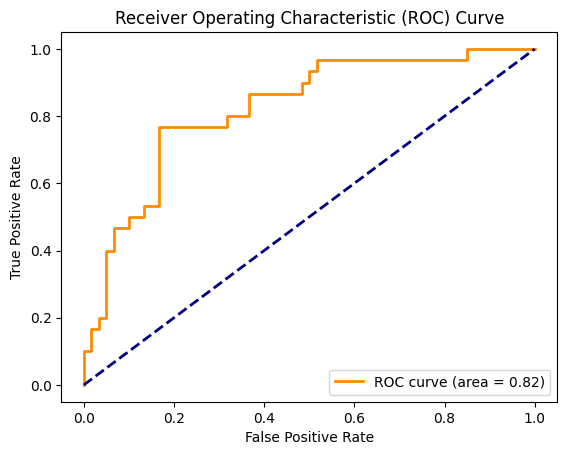

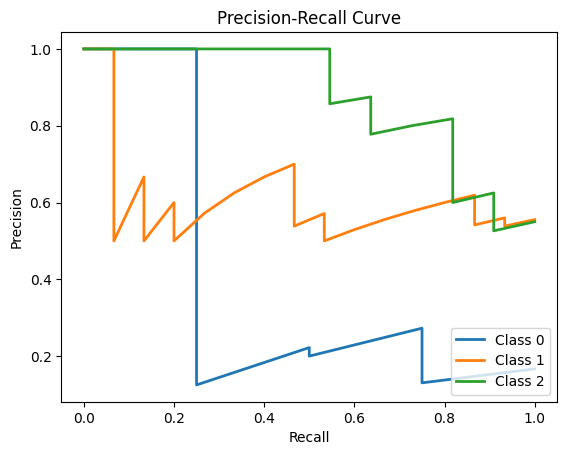

In [15]:

# Load the training data
X_train, y_train = load_data(train_dir)
# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the Logistic Regression model
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Binarize the labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

clf.fit(X_train, y_train_encoded)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), clf.decision_function(X_test).ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision = dict()
recall = dict()
for i in range(len(np.unique(y_train_encoded))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], clf.decision_function(X_test)[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.show()


## keep 10 percent for test and do that 10 times

Accuracy: 0.6363636363636364
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.69      0.69      0.69        13
           2       0.56      0.83      0.67         6

    accuracy                           0.64        22
   macro avg       0.42      0.51      0.45        22
weighted avg       0.56      0.64      0.59        22

Confusion Matrix:
[[0 3 0]
 [0 9 4]
 [0 1 5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

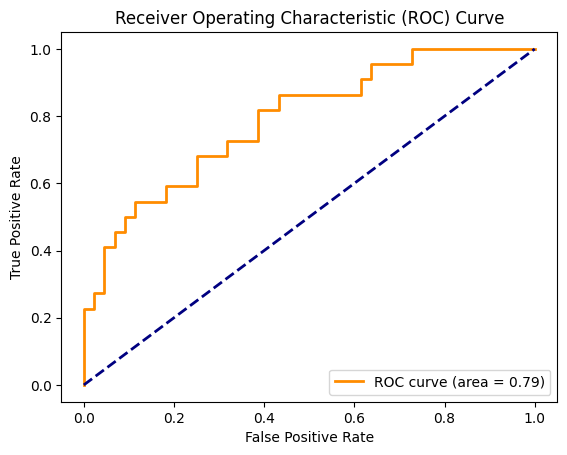

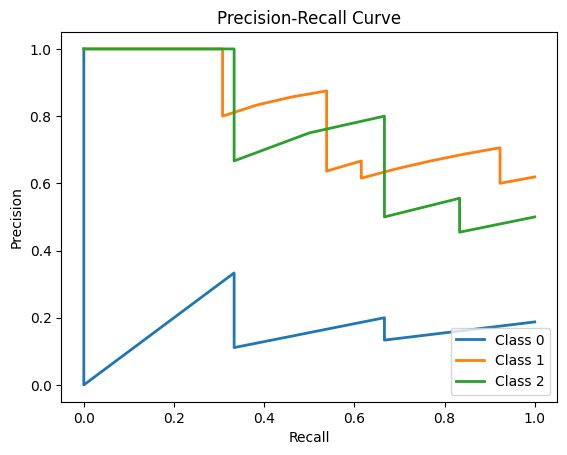

Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      0.82      0.69        11
           2       0.60      0.38      0.46         8

    accuracy                           0.60        20
   macro avg       0.40      0.40      0.38        20
weighted avg       0.57      0.60      0.57        20

Confusion Matrix:
[[0 1 0]
 [0 9 2]
 [0 5 3]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

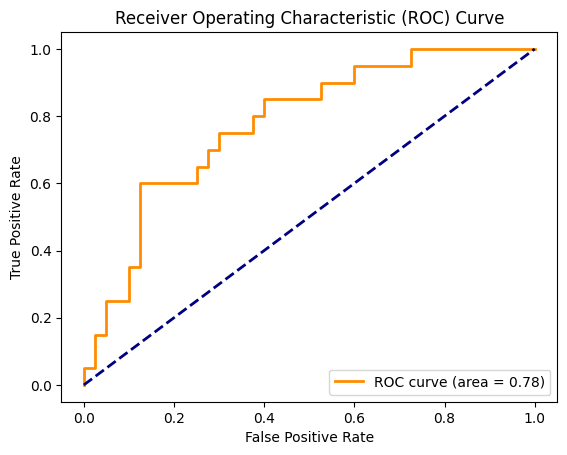

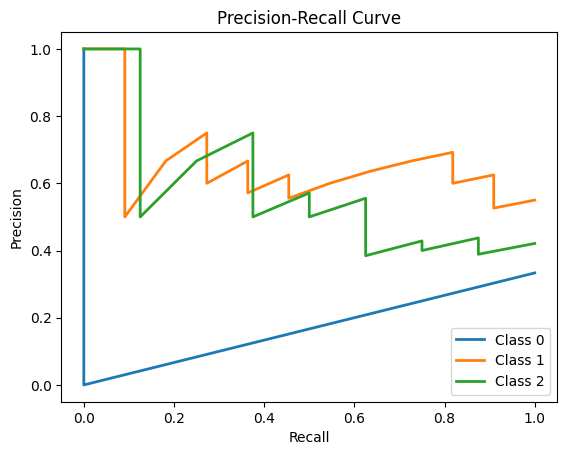

Accuracy: 0.5555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.70      0.64        10
           2       0.50      0.43      0.46         7

    accuracy                           0.56        18
   macro avg       0.36      0.38      0.37        18
weighted avg       0.52      0.56      0.53        18

Confusion Matrix:
[[0 1 0]
 [0 7 3]
 [0 4 3]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

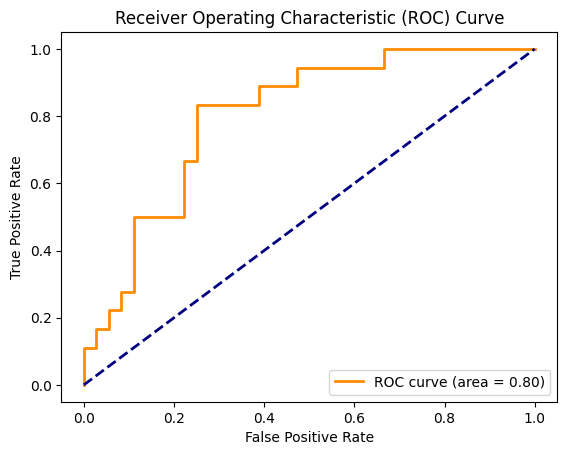

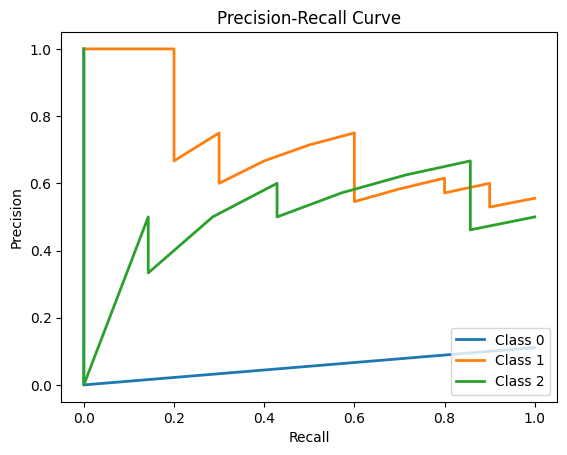

Accuracy: 0.5625
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.71      0.63         7
           2       0.57      0.57      0.57         7

    accuracy                           0.56        16
   macro avg       0.38      0.43      0.40        16
weighted avg       0.49      0.56      0.52        16

Confusion Matrix:
[[0 1 1]
 [0 5 2]
 [0 3 4]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

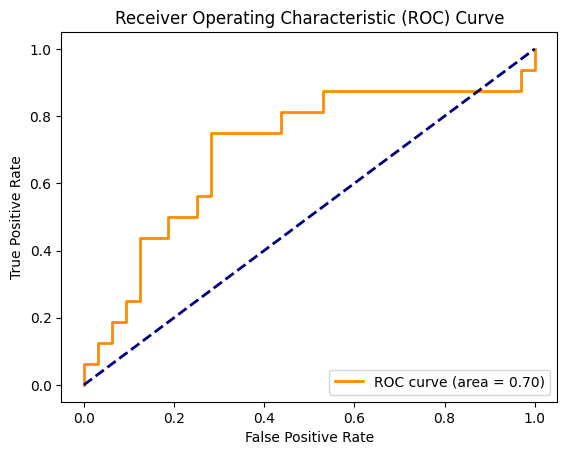

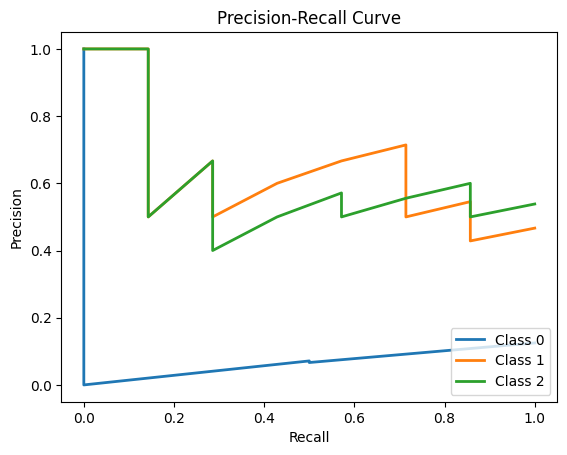

Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.75      0.71         8
           2       0.40      0.40      0.40         5

    accuracy                           0.57        14
   macro avg       0.36      0.38      0.37        14
weighted avg       0.52      0.57      0.55        14

Confusion Matrix:
[[0 0 1]
 [0 6 2]
 [0 3 2]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

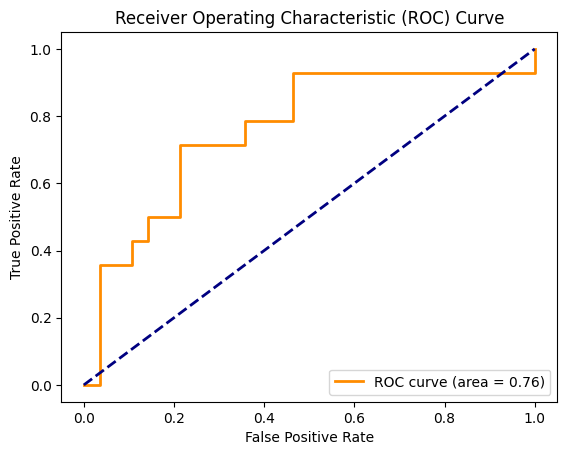

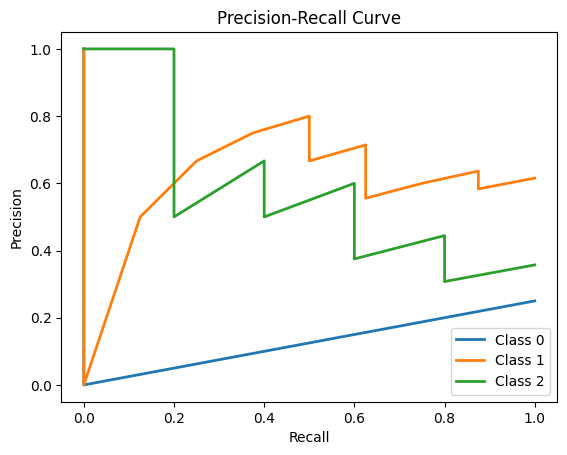

Accuracy: 0.6923076923076923
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           2       0.75      0.75      0.75         8

    accuracy                           0.69        13
   macro avg       0.68      0.68      0.68        13
weighted avg       0.69      0.69      0.69        13

Confusion Matrix:
[[3 2]
 [2 6]]


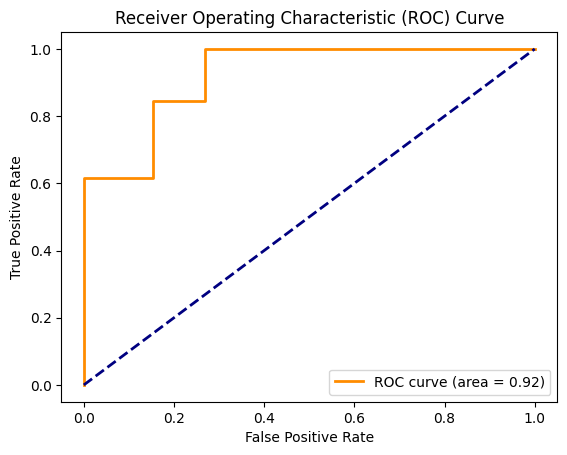

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


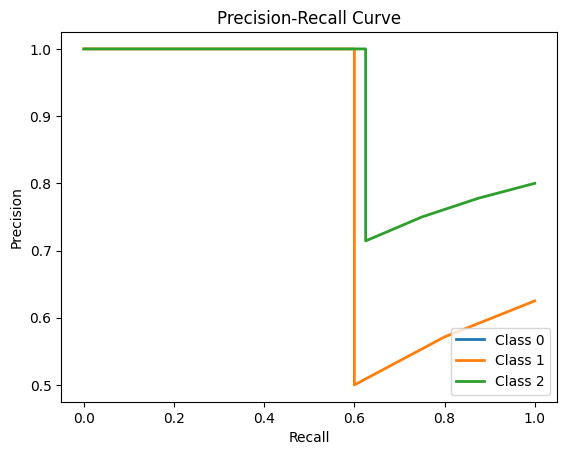

Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.88      0.88         8
           2       0.75      0.75      0.75         4

    accuracy                           0.83        12
   macro avg       0.81      0.81      0.81        12
weighted avg       0.83      0.83      0.83        12

Confusion Matrix:
[[7 1]
 [1 3]]


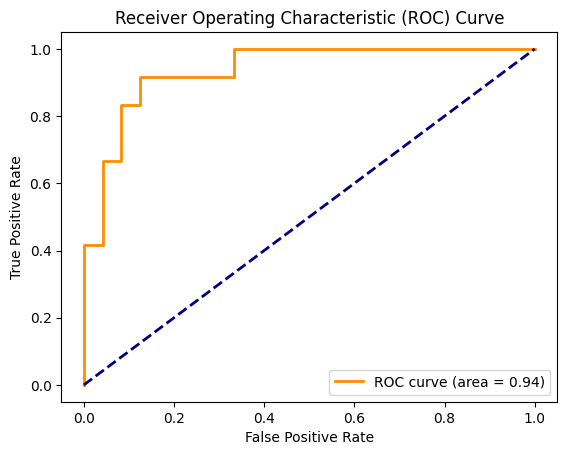

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


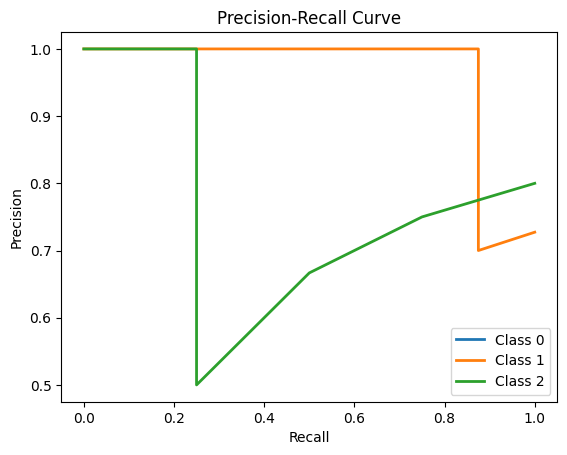

Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.67      0.80      0.73         5

    accuracy                           0.73        11
   macro avg       0.73      0.73      0.73        11
weighted avg       0.74      0.73      0.73        11

Confusion Matrix:
[[4 2]
 [1 4]]


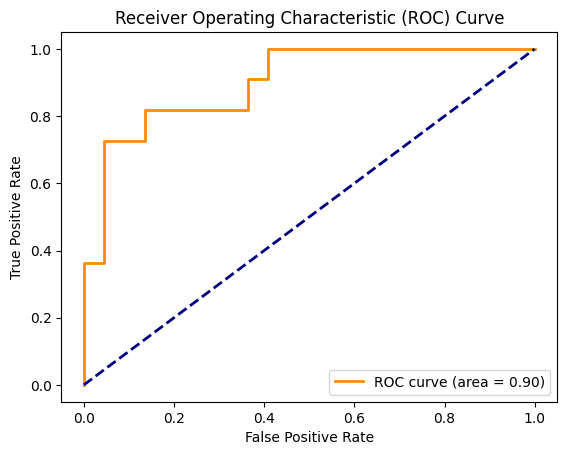

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


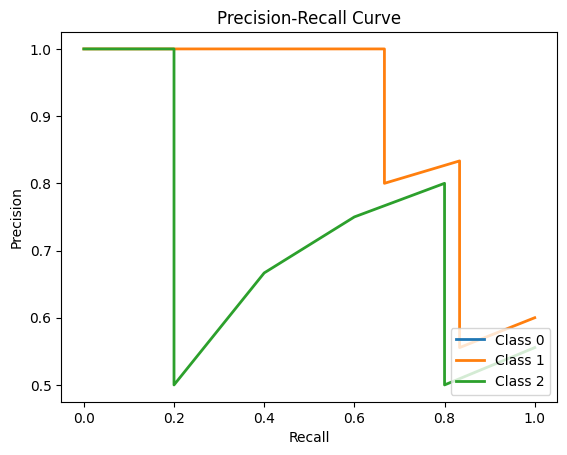

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       0.75      0.60      0.67         5

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9

Confusion Matrix:
[[3 1]
 [2 3]]


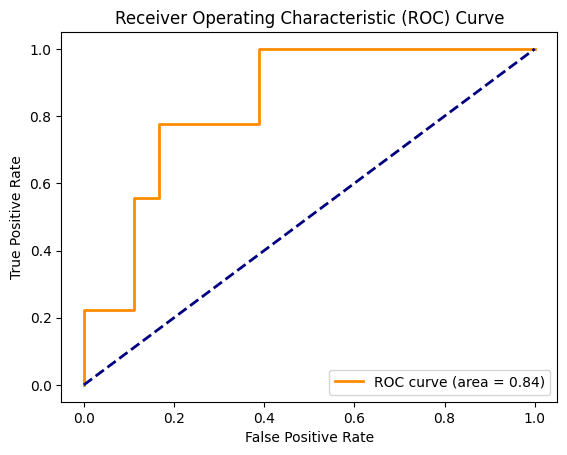

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


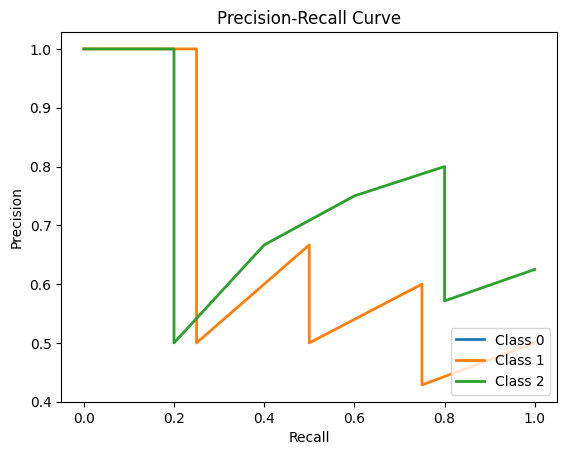

Accuracy: 0.7777777777777778
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         8
           2       0.33      1.00      0.50         1

    accuracy                           0.78         9
   macro avg       0.67      0.88      0.68         9
weighted avg       0.93      0.78      0.82         9

Confusion Matrix:
[[6 2]
 [0 1]]


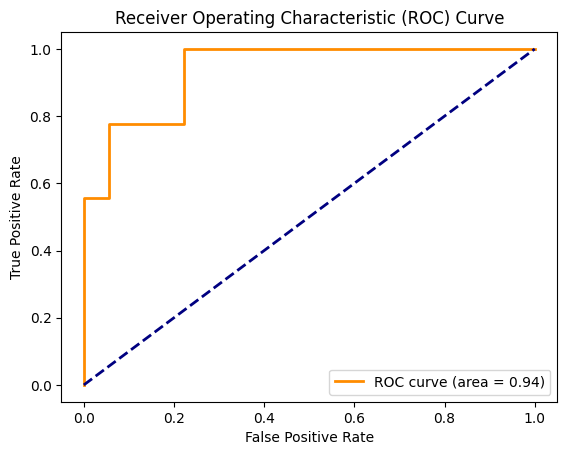

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


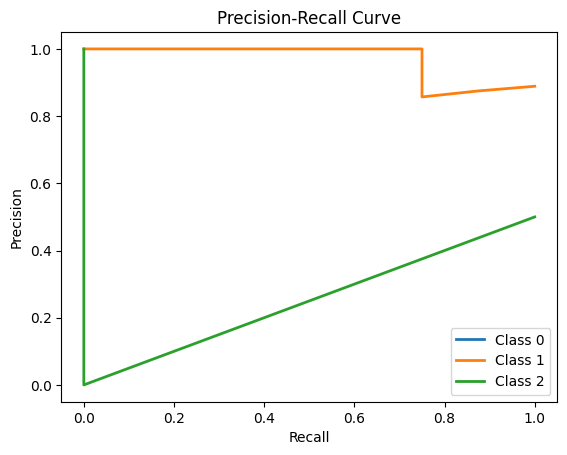

In [16]:

# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'
test_dir = '../DataSetThesis/test'

# Load the training data
X_train, y_train = load_data(train_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Keep 10% of the data for testing, and repeat the process 10 times
for _ in range(10):
    # Split the data into training (90%) and testing (10%) sets
    X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
        X_train, y_train_encoded, test_size=0.1, random_state=None  # Add a random seed if needed
    )

    # Create and train the Logistic Regression model
    clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

    # Binarize the labels
    y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

    clf.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f'Accuracy: {accuracy}')

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test_encoded, y_pred))

    # Print confusion matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), clf.decision_function(X_test).ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot precision-recall curve
    precision = dict()
    recall = dict()
    for i in range(len(np.unique(y_train_encoded))):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], clf.decision_function(X_test)[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower right")
    plt.show()


## with cv=10

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


Fold 1 Accuracy: 0.5454545454545454
Fold 2 Accuracy: 0.45454545454545453
Fold 3 Accuracy: 0.5909090909090909
Fold 4 Accuracy: 0.45454545454545453
Fold 5 Accuracy: 0.7272727272727273
Fold 6 Accuracy: 0.8636363636363636
Fold 7 Accuracy: 0.38095238095238093
Fold 8 Accuracy: 0.47619047619047616
Fold 9 Accuracy: 0.47619047619047616
Fold 10 Accuracy: 0.2857142857142857
Mean Accuracy: 0.5255411255411255


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


Overall Accuracy: 0.5277777777777778
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.63      0.60      0.61       117
           2       0.58      0.58      0.58        89

   micro avg       0.60      0.56      0.58       216
   macro avg       0.40      0.39      0.40       216
weighted avg       0.58      0.56      0.57       216
 samples avg       0.55      0.56      0.55       216

Confusion Matrix:
[[ 1  6  3]
 [15 70 32]
 [ 9 34 46]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


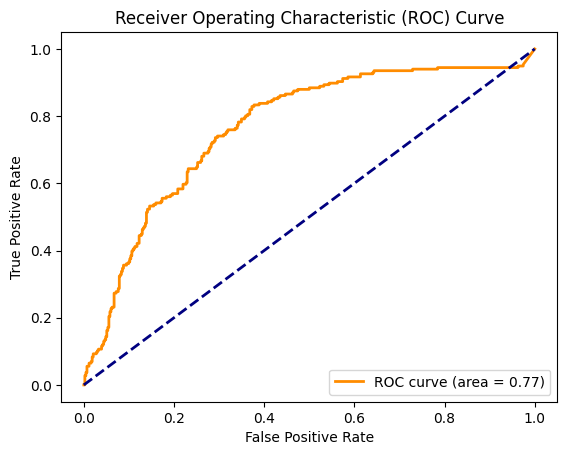

/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])


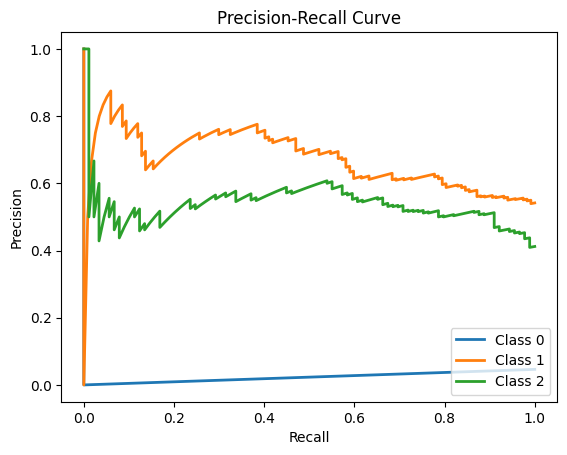

In [20]:


# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'
test_dir = '../DataSetThesis/test'

# Load the training data
X_train, y_train = load_data(train_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create and train the Logistic Regression model
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# Binarize the labels
y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))

# Perform 10-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train_binarized, cv=10, scoring='accuracy')

# Print accuracy for each fold
for fold, accuracy in enumerate(cv_scores, start=1):
    print(f'Fold {fold} Accuracy: {accuracy}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(cv_scores)
print(f'Mean Accuracy: {mean_accuracy}')

# Make predictions using cross_val_predict for detailed evaluation
y_pred = cross_val_predict(clf, X_train, y_train_binarized, cv=10)

# Evaluate the model
accuracy = accuracy_score(y_train_binarized, y_pred)
print(f'Overall Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_train_binarized, y_pred))


# Convert binarized labels back to original labels
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train_encoded)
y_train_original = label_binarizer.inverse_transform(y_train_binarized)
y_pred_original = label_binarizer.inverse_transform(y_pred)

# Now you can calculate the confusion matrix
cm = confusion_matrix(y_train_original, y_pred_original)
print("Confusion Matrix:")
print(cm)


# Plot ROC curve
fpr, tpr, _ = roc_curve(y_train_binarized.ravel(), cross_val_predict(clf, X_train, y_train_binarized, cv=10, method='predict_proba').ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision = dict()
recall = dict()
for i in range(len(np.unique(y_train_encoded))):
    precision[i], recall[i], _ = precision_recall_curve(y_train_binarized[:, i], cross_val_predict(clf, X_train, y_train_binarized, cv=10, method='predict_proba')[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.show()


## keeping 10% with CV

Iteration 1 - Accuracy: 0.6818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.83      0.74        12
           2       0.71      0.56      0.63         9

    accuracy                           0.68        22
   macro avg       0.46      0.46      0.46        22
weighted avg       0.66      0.68      0.66        22

Confusion Matrix:
[[ 0  1  0]
 [ 0 10  2]
 [ 0  4  5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

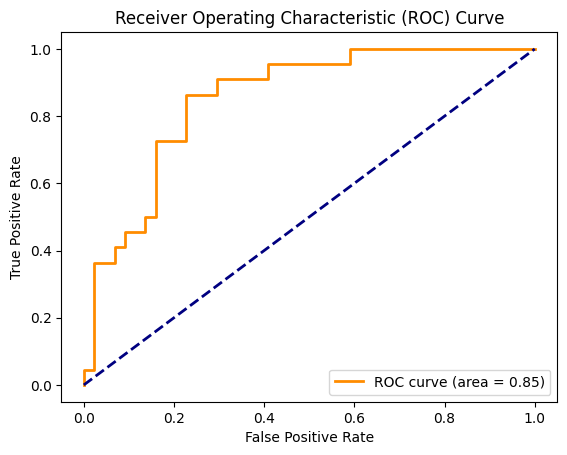

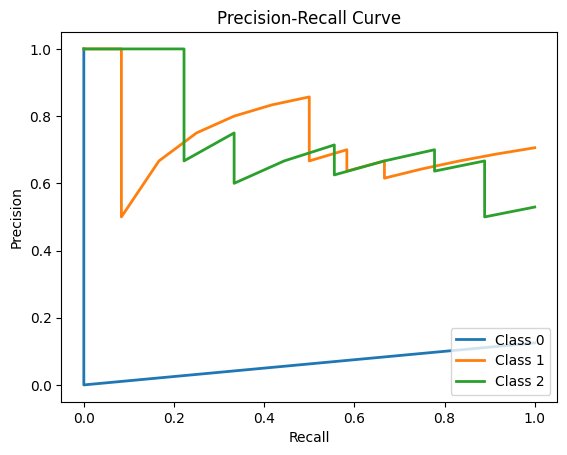

Iteration 2 - Accuracy: 0.6818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.67      0.73        12
           2       0.58      0.78      0.67         9

    accuracy                           0.68        22
   macro avg       0.46      0.48      0.46        22
weighted avg       0.68      0.68      0.67        22

Confusion Matrix:
[[0 0 1]
 [0 8 4]
 [0 2 7]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

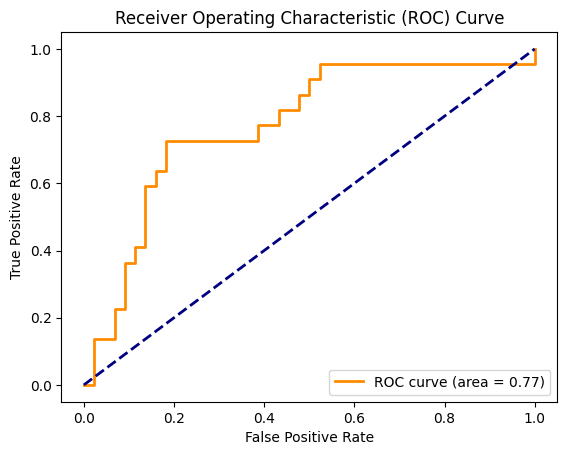

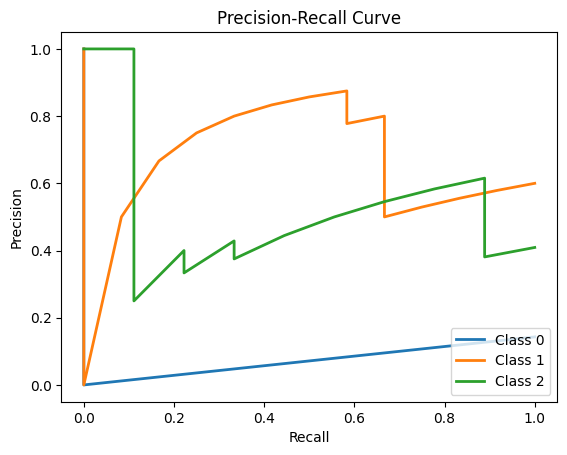

Iteration 3 - Accuracy: 0.6818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.58      0.70        12
           2       0.62      0.89      0.73         9

    accuracy                           0.68        22
   macro avg       0.50      0.49      0.48        22
weighted avg       0.73      0.68      0.68        22

Confusion Matrix:
[[0 0 1]
 [1 7 4]
 [0 1 8]]


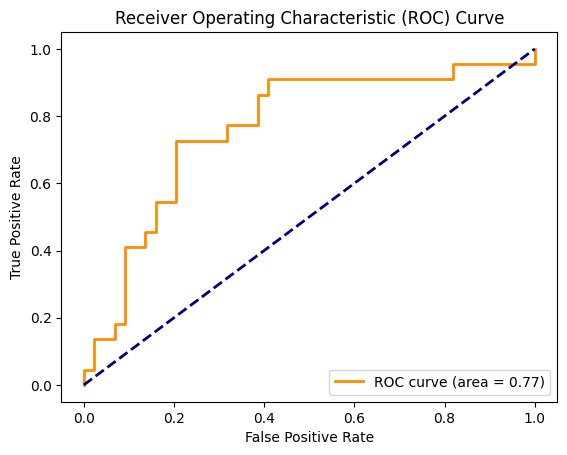

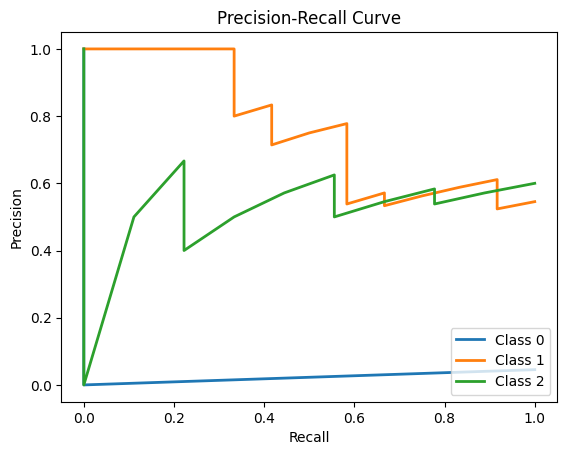

Iteration 4 - Accuracy: 0.5454545454545454
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.58      0.58        12
           2       0.50      0.56      0.53         9

    accuracy                           0.55        22
   macro avg       0.36      0.38      0.37        22
weighted avg       0.52      0.55      0.53        22

Confusion Matrix:
[[0 1 0]
 [0 7 5]
 [0 4 5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

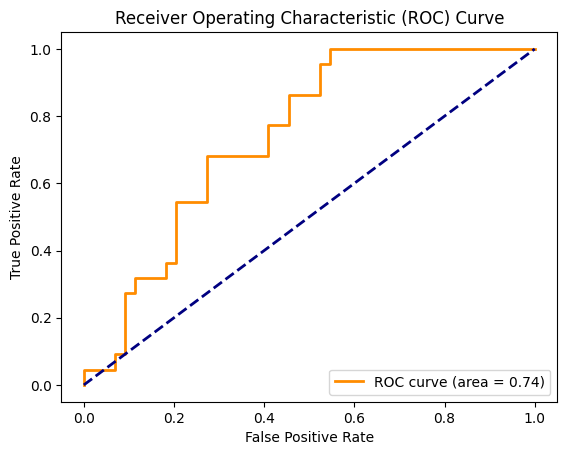

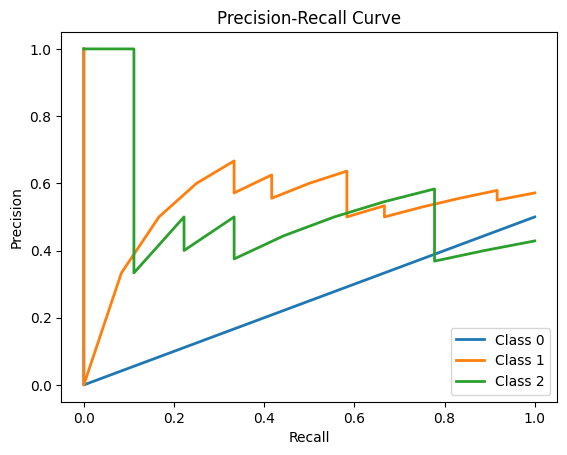

Iteration 5 - Accuracy: 0.6363636363636364
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.75      0.72        12
           2       0.56      0.56      0.56         9

    accuracy                           0.64        22
   macro avg       0.42      0.44      0.43        22
weighted avg       0.60      0.64      0.62        22

Confusion Matrix:
[[0 0 1]
 [0 9 3]
 [0 4 5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

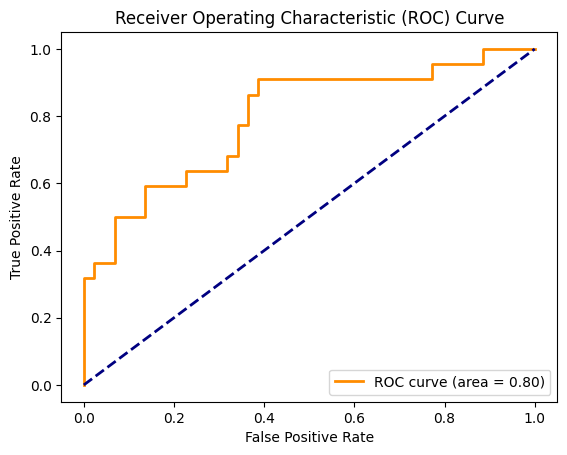

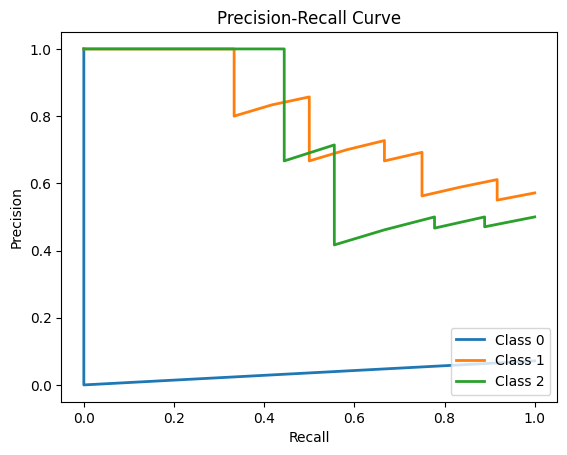

Iteration 6 - Accuracy: 0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.82      0.75      0.78        12
           2       0.73      0.89      0.80         9

    accuracy                           0.77        22
   macro avg       0.52      0.55      0.53        22
weighted avg       0.74      0.77      0.75        22

Confusion Matrix:
[[0 1 0]
 [0 9 3]
 [0 1 8]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

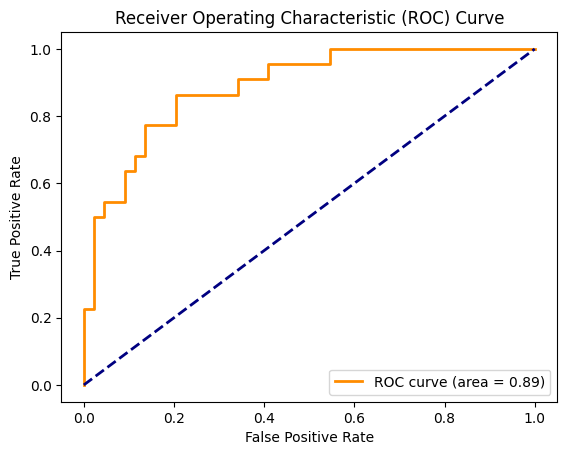

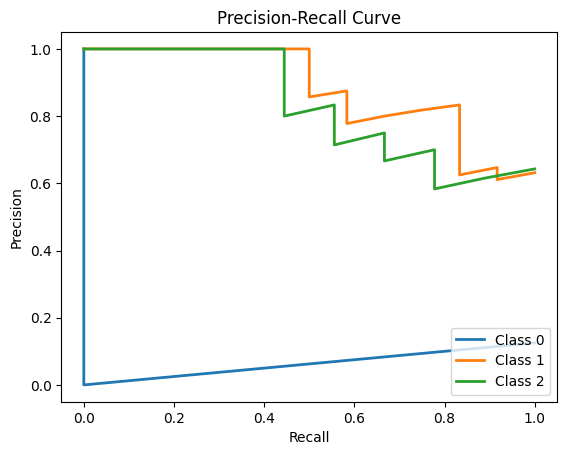

Iteration 7 - Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.91      0.77        11
           2       0.83      0.56      0.67         9

    accuracy                           0.71        21
   macro avg       0.50      0.49      0.48        21
weighted avg       0.71      0.71      0.69        21

Confusion Matrix:
[[ 0  1  0]
 [ 0 10  1]
 [ 0  4  5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

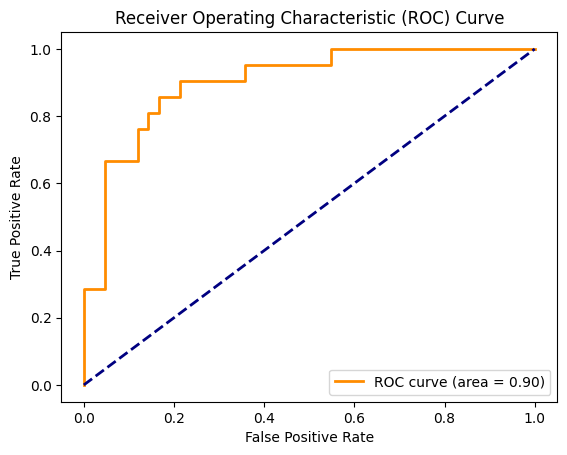

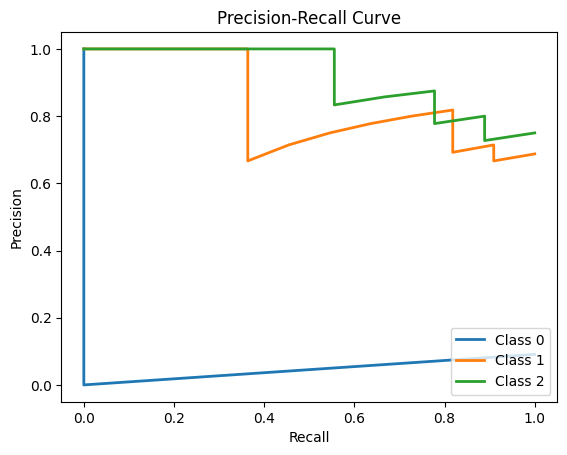

Iteration 8 - Accuracy: 0.6190476190476191
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      0.64      0.67        11
           2       0.60      0.67      0.63         9

    accuracy                           0.62        21
   macro avg       0.43      0.43      0.43        21
weighted avg       0.62      0.62      0.62        21

Confusion Matrix:
[[0 0 1]
 [1 7 3]
 [0 3 6]]


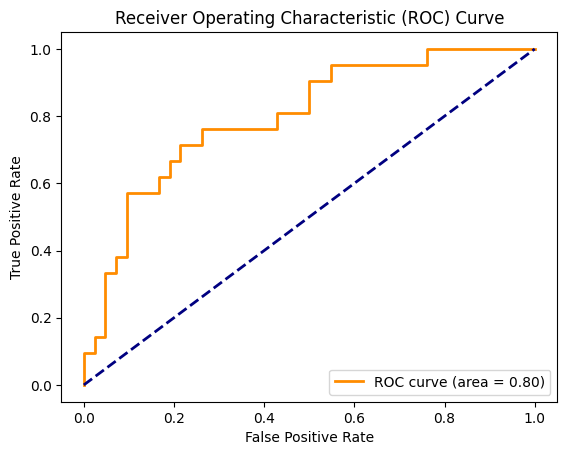

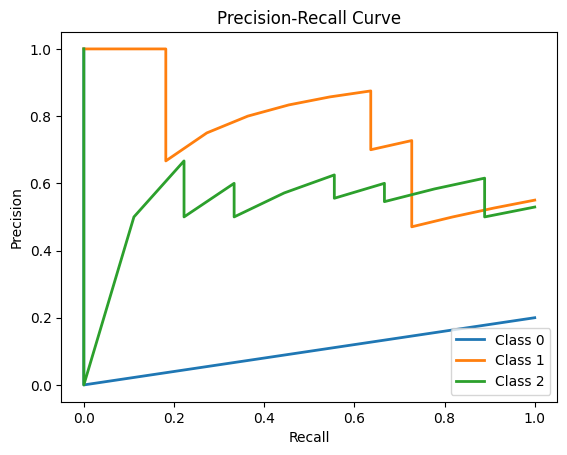

Iteration 9 - Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.91      0.77        11
           2       0.83      0.56      0.67         9

    accuracy                           0.71        21
   macro avg       0.50      0.49      0.48        21
weighted avg       0.71      0.71      0.69        21

Confusion Matrix:
[[ 0  1  0]
 [ 0 10  1]
 [ 0  4  5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

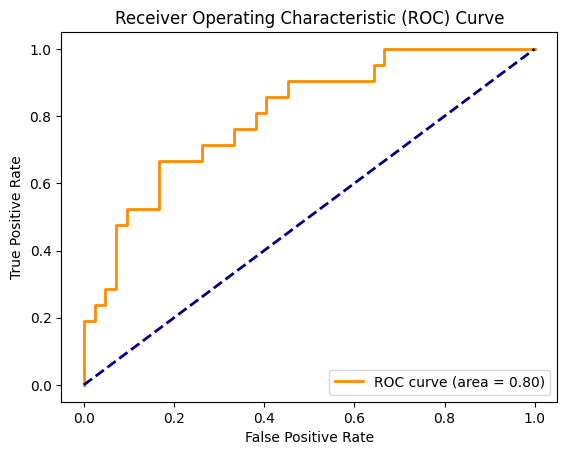

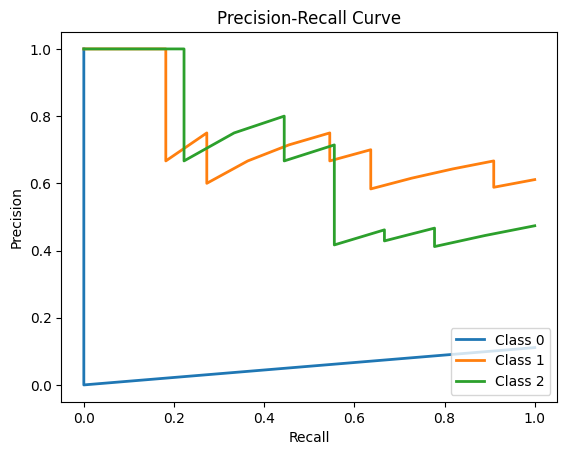

Iteration 10 - Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75        12
           2       0.67      0.75      0.71         8

    accuracy                           0.71        21
   macro avg       0.47      0.50      0.49        21
weighted avg       0.68      0.71      0.70        21

Confusion Matrix:
[[0 1 0]
 [0 9 3]
 [0 2 6]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

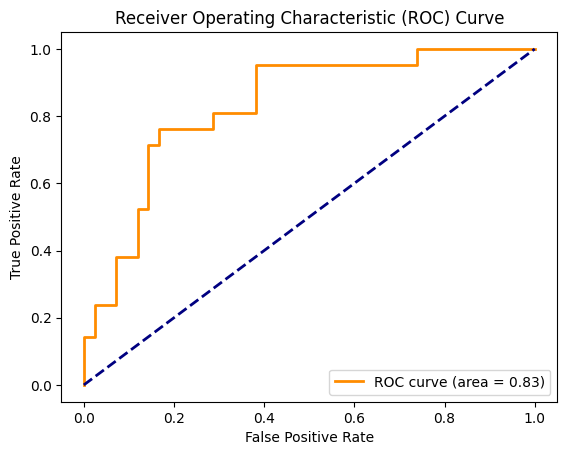

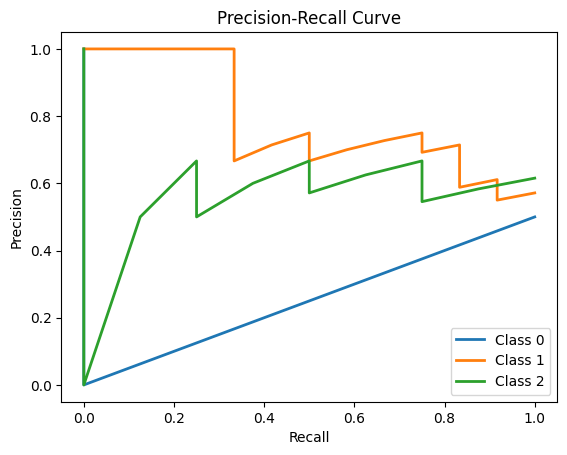

In [18]:


# Initialize StratifiedKFold with 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train_encoded)):
    # Step 1: Split 10% for prediction
    X_predict, y_predict = X_train[test_index], y_train_encoded[test_index]

    # Step 2: Train on 90% using 10-fold cross-validation
    clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

    # Binarize the labels
    y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))

    clf.fit(X_train[train_index], y_train_encoded[train_index])

    # Step 3: Make predictions and collect metrics
    y_pred = clf.predict(X_predict)

    # Evaluate the model
    accuracy = accuracy_score(y_predict, y_pred)
    print(f'Iteration {i + 1} - Accuracy: {accuracy}')

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_predict, y_pred))

    # Print confusion matrix
    cm = confusion_matrix(y_predict, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(label_binarize(y_predict, classes=np.unique(y_train_encoded)).ravel(),
                            clf.decision_function(X_predict).ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot precision-recall curve
    precision = dict()
    recall = dict()
    for i in range(len(np.unique(y_train_encoded))):
        precision[i], recall[i], _ = precision_recall_curve(label_binarize(y_predict, classes=np.unique(y_train_encoded))[:, i],
                                                            clf.decision_function(X_predict)[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower right")
    plt.show()


## PCA with 10% test

Iteration 1 - Accuracy: 0.5909090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.60      0.75      0.67        12
           2       0.57      0.44      0.50         9

    accuracy                           0.59        22
   macro avg       0.39      0.40      0.39        22
weighted avg       0.56      0.59      0.57        22

Confusion Matrix:
[[0 1 0]
 [0 9 3]
 [0 5 4]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

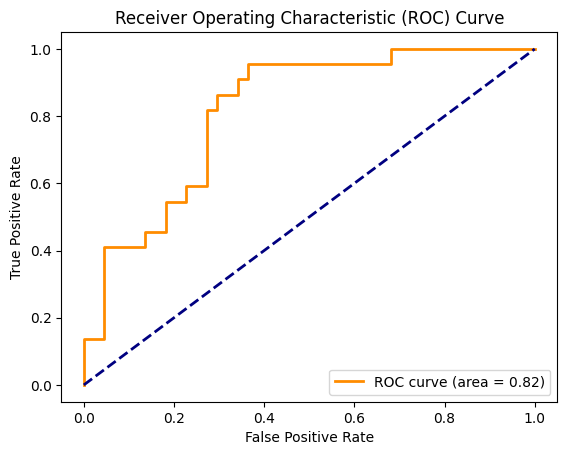

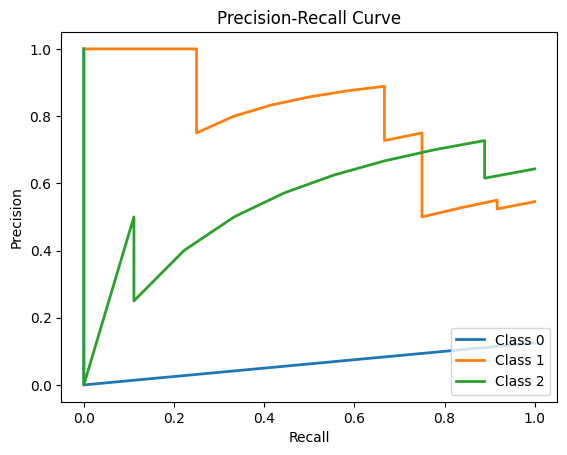

Iteration 2 - Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.82      0.75      0.78        12
           2       0.64      0.78      0.70         9

    accuracy                           0.73        22
   macro avg       0.48      0.51      0.49        22
weighted avg       0.71      0.73      0.71        22

Confusion Matrix:
[[0 0 1]
 [0 9 3]
 [0 2 7]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

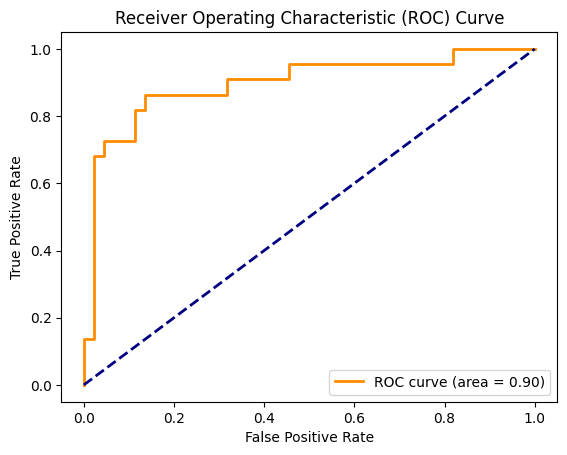

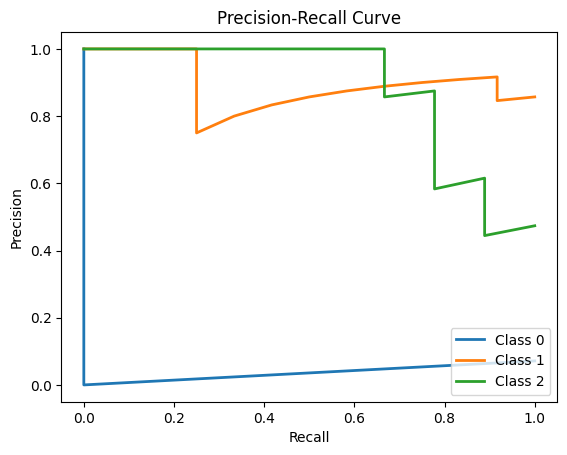

Iteration 3 - Accuracy: 0.8636363636363636
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      0.92      0.92        12
           2       0.80      0.89      0.84         9

    accuracy                           0.86        22
   macro avg       0.57      0.60      0.59        22
weighted avg       0.83      0.86      0.84        22

Confusion Matrix:
[[ 0  0  1]
 [ 0 11  1]
 [ 0  1  8]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

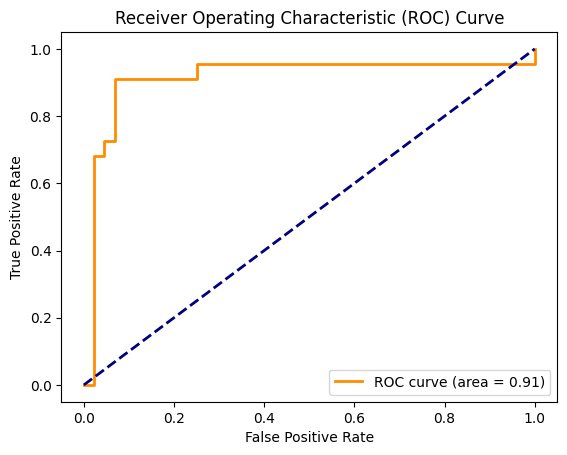

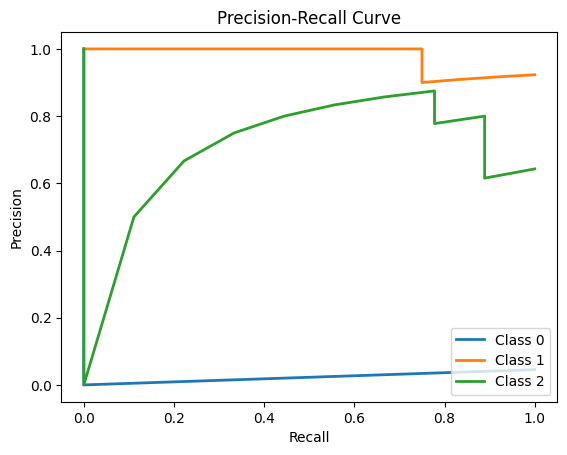

Iteration 4 - Accuracy: 0.4090909090909091
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.45      0.42      0.43        12
           2       0.36      0.44      0.40         9

    accuracy                           0.41        22
   macro avg       0.27      0.29      0.28        22
weighted avg       0.40      0.41      0.40        22

Confusion Matrix:
[[0 1 0]
 [0 5 7]
 [0 5 4]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

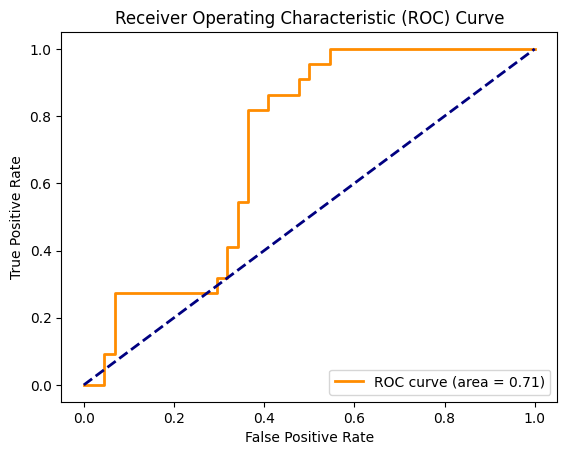

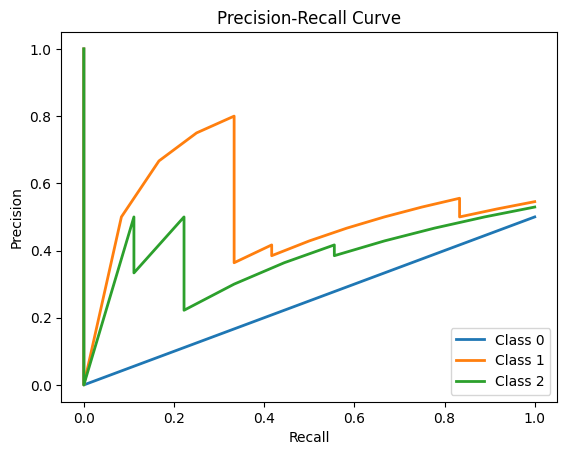

Iteration 5 - Accuracy: 0.6818181818181818
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.69      0.75      0.72        12
           2       0.67      0.67      0.67         9

    accuracy                           0.68        22
   macro avg       0.45      0.47      0.46        22
weighted avg       0.65      0.68      0.67        22

Confusion Matrix:
[[0 1 0]
 [0 9 3]
 [0 3 6]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

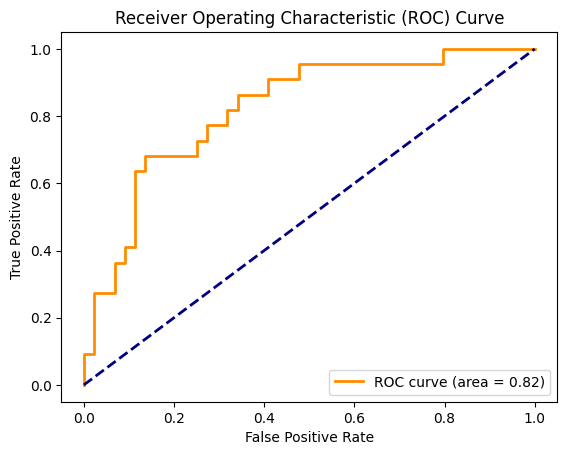

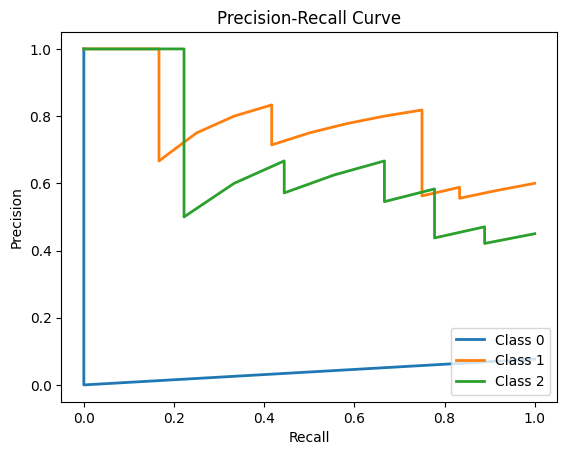

Iteration 6 - Accuracy: 0.5909090909090909
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.58      0.92      0.71        12
           2       0.67      0.22      0.33         9

    accuracy                           0.59        22
   macro avg       0.42      0.38      0.35        22
weighted avg       0.59      0.59      0.52        22

Confusion Matrix:
[[ 0  1  0]
 [ 0 11  1]
 [ 0  7  2]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

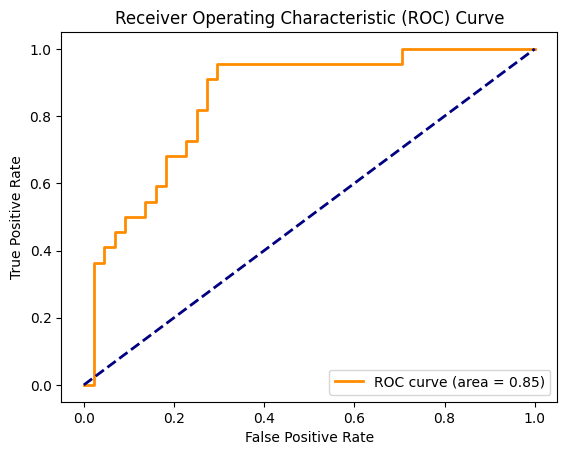

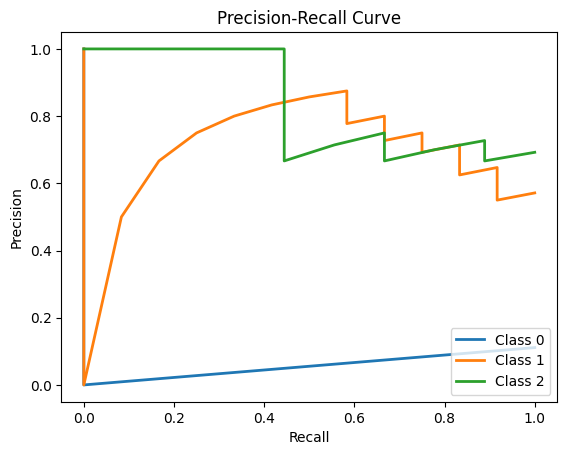

Iteration 7 - Accuracy: 0.7619047619047619
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.71      0.91      0.80        11
           2       0.86      0.67      0.75         9

    accuracy                           0.76        21
   macro avg       0.52      0.53      0.52        21
weighted avg       0.74      0.76      0.74        21

Confusion Matrix:
[[ 0  1  0]
 [ 0 10  1]
 [ 0  3  6]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

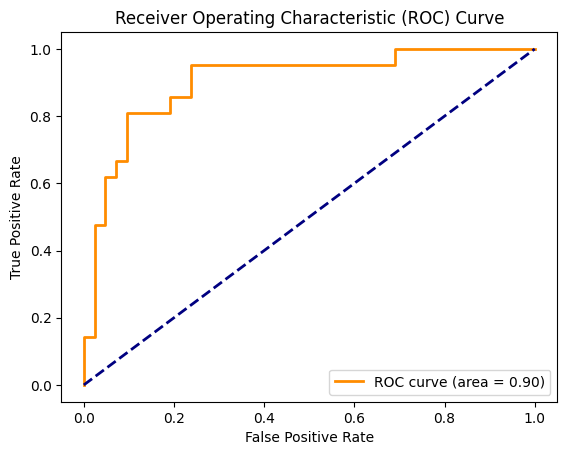

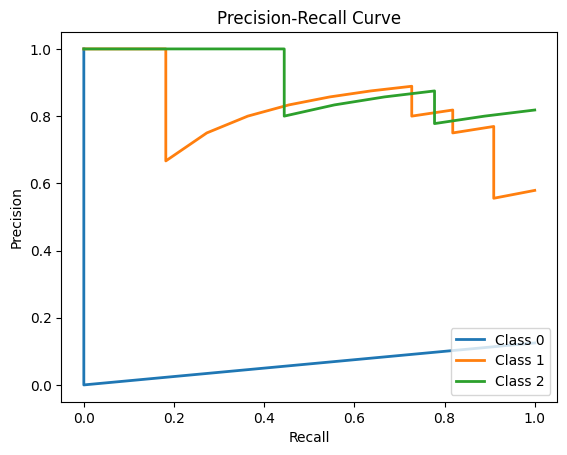

Iteration 8 - Accuracy: 0.5238095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.55      0.55      0.55        11
           2       0.50      0.56      0.53         9

    accuracy                           0.52        21
   macro avg       0.35      0.37      0.36        21
weighted avg       0.50      0.52      0.51        21

Confusion Matrix:
[[0 1 0]
 [0 6 5]
 [0 4 5]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

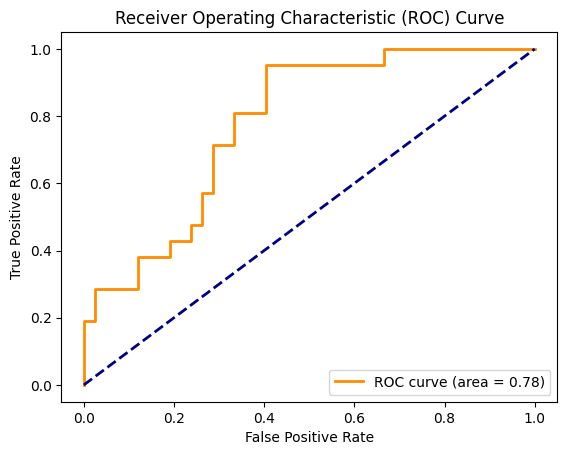

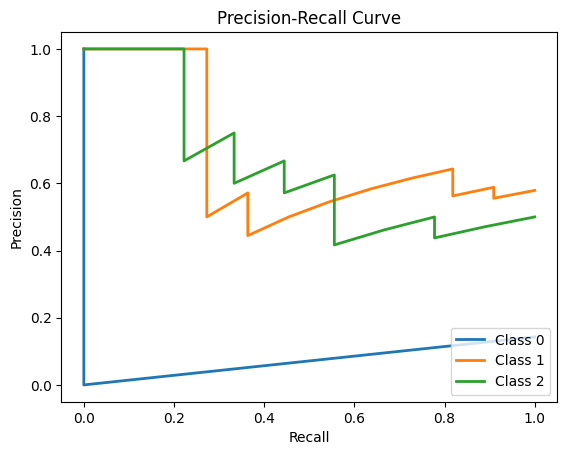

Iteration 9 - Accuracy: 0.5238095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.54      0.64      0.58        11
           2       0.50      0.44      0.47         9

    accuracy                           0.52        21
   macro avg       0.35      0.36      0.35        21
weighted avg       0.50      0.52      0.51        21

Confusion Matrix:
[[0 1 0]
 [0 7 4]
 [0 5 4]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

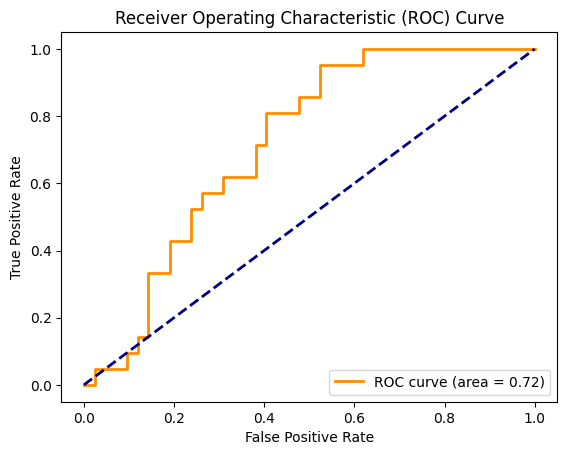

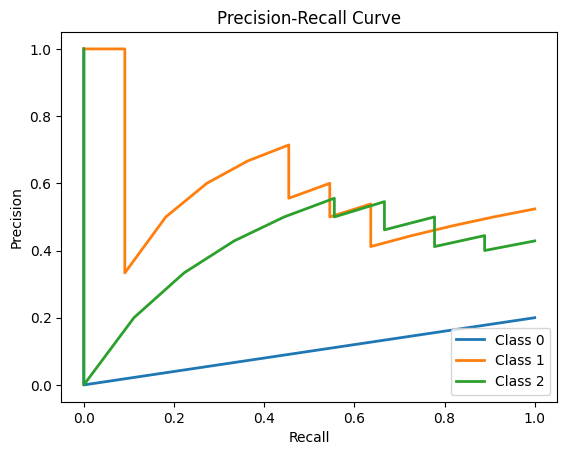

Iteration 10 - Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.73      0.67      0.70        12
           2       0.60      0.75      0.67         8

    accuracy                           0.67        21
   macro avg       0.44      0.47      0.45        21
weighted avg       0.64      0.67      0.65        21

Confusion Matrix:
[[0 1 0]
 [0 8 4]
 [0 2 6]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

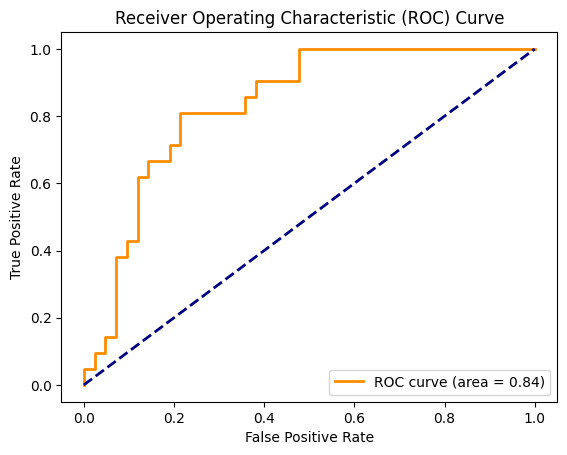

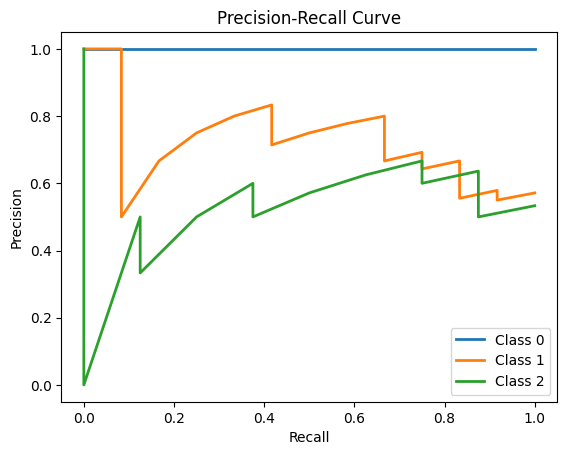

In [21]:


# Initialize StratifiedKFold with 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train_encoded)):
    # Step 1: Split 10% for prediction
    X_predict, y_predict = X_train[test_index], y_train_encoded[test_index]

    # Step 2: Apply PCA to the training data
    pca = PCA(n_components=4)
    X_train_pca = pca.fit_transform(X_train[train_index])
    X_predict_pca = pca.transform(X_predict)

    # Step 3: Train on 90% using 10-fold cross-validation with PCA-transformed data
    clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

    # Binarize the labels
    y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))

    clf.fit(X_train_pca, y_train_encoded[train_index])

    # Step 4: Make predictions and collect metrics
    y_pred = clf.predict(X_predict_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_predict, y_pred)
    print(f'Iteration {i + 1} - Accuracy: {accuracy}')

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_predict, y_pred))

    # Print confusion matrix
    cm = confusion_matrix(y_predict, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(label_binarize(y_predict, classes=np.unique(y_train_encoded)).ravel(),
                            clf.decision_function(X_predict_pca).ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Plot precision-recall curve
    precision = dict()
    recall = dict()
    for i in range(len(np.unique(y_train_encoded))):
        precision[i], recall[i], _ = precision_recall_curve(label_binarize(y_predict, classes=np.unique(y_train_encoded))[:, i],
                                                            clf.decision_function(X_predict_pca)[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower right")
    plt.show()


## Performance Evaluation of Logistic Regression with PCA Transformation and Cross-Validation

In [22]:


# Initialize lists to store metric values
accuracy_scores = []
precision_scores = []
recall_scores = []
roc_auc_scores = []

# Initialize StratifiedKFold with 10 folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train_encoded)):
    # Step 1: Split 10% for prediction
    X_predict, y_predict = X_train[test_index], y_train_encoded[test_index]

    # Step 2: Apply PCA to the training data
    pca = PCA(n_components=3)
    X_train_pca = pca.fit_transform(X_train[train_index])
    X_predict_pca = pca.transform(X_predict)

    # Step 3: Train on 90% using 10-fold cross-validation with PCA-transformed data
    clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

    # Binarize the labels
    y_train_binarized = label_binarize(y_train_encoded, classes=np.unique(y_train_encoded))

    clf.fit(X_train_pca, y_train_encoded[train_index])

    # Step 4: Make predictions and collect metrics
    y_pred = clf.predict(X_predict_pca)

    # Evaluate the model
    accuracy = accuracy_score(y_predict, y_pred)
    accuracy_scores.append(accuracy)

    # Collect precision, recall, and ROC AUC
    precision_fold, recall_fold, _ = precision_recall_curve(label_binarize(y_predict, classes=np.unique(y_train_encoded)).ravel(),
                                                            clf.decision_function(X_predict_pca).ravel())
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    
    fpr, tpr, _ = roc_curve(label_binarize(y_predict, classes=np.unique(y_train_encoded)).ravel(),
                            clf.decision_function(X_predict_pca).ravel())
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

# Calculate and print mean metrics
print('Average Precision:')
common_recall = np.unique(np.concatenate([recall_fold for recall_fold in recall_scores]))
for i in range(len(np.unique(y_train_encoded))):
    # Ensure that all precision values have the same length by interpolating to a common set of recall values
    common_precision = np.mean([np.interp(common_recall, recall_fold, prec_fold) for recall_fold, prec_fold in zip(recall_scores, precision_scores)], axis=0)
    
    avg_precision = np.mean(common_precision)
    print(f'Class {i}: {avg_precision}')

# Ensure that all recall values have the same length by interpolating to a common set of recall values
common_recall_scores = [np.interp(common_recall, recall_fold, recall_fold) for recall_fold in recall_scores]
# Calculate and print mean recall
print(f'Average Recall: {np.mean(common_recall_scores)}')



Average Precision:
Class 0: 0.9868073722613124
Class 1: 0.9868073722613124
Class 2: 0.9868073722613124
Average Recall: 0.023255813953488372


## Optimization for LR

In [24]:

# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the Logistic Regression model with hyperparameter tuning
param_grid = {'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Use OneVsRestClassifier to handle multiclass
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

print("Best perfromance happened with the follwing:",best_clf)



Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.65      0.87      0.74        15
           2       0.80      0.73      0.76        11

    accuracy                           0.70        30
   macro avg       0.48      0.53      0.50        30
weighted avg       0.62      0.70      0.65        30

Confusion Matrix:
[[ 0  4  0]
 [ 0 13  2]
 [ 0  3  8]]
Best perfromance happened with the follwing: OneVsRestClassifier(estimator=LogisticRegression(C=0.001, max_iter=1000))


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## SVM

In [25]:

# Load the training data
X_train, y_train = load_data(train_dir)

# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train_encoded)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6666666666666666


Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.63      0.80      0.71        15
           2       0.70      0.64      0.67        11

    accuracy                           0.67        30
   macro avg       0.78      0.56      0.59        30
weighted avg       0.71      0.67      0.65        30

Confusion Matrix:
[[ 1  3  0]
 [ 0 12  3]
 [ 0  4  7]]


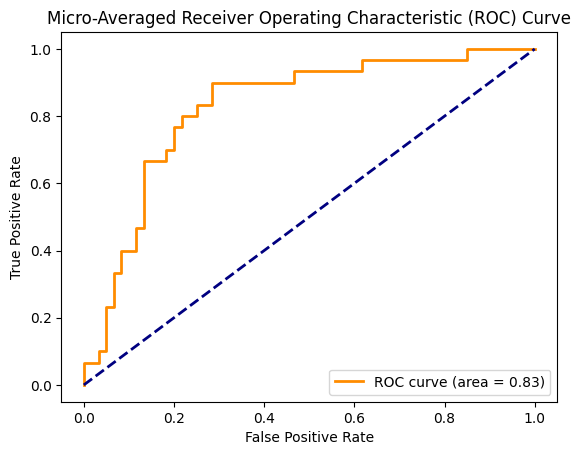

In [28]:

# Create and train the SVM model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train_encoded)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)




# Calculate the probabilities for each class
y_score = clf.decision_function(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

# Compute micro-averaged ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Averaged Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## "Performance Evaluation of Multiclass SVM Classifier with ROC and Precision-Recall Curves"

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.63      0.80      0.71        15
           2       0.70      0.64      0.67        11

    accuracy                           0.67        30
   macro avg       0.78      0.56      0.59        30
weighted avg       0.71      0.67      0.65        30

Confusion Matrix:
[[ 1  3  0]
 [ 0 12  3]
 [ 0  4  7]]


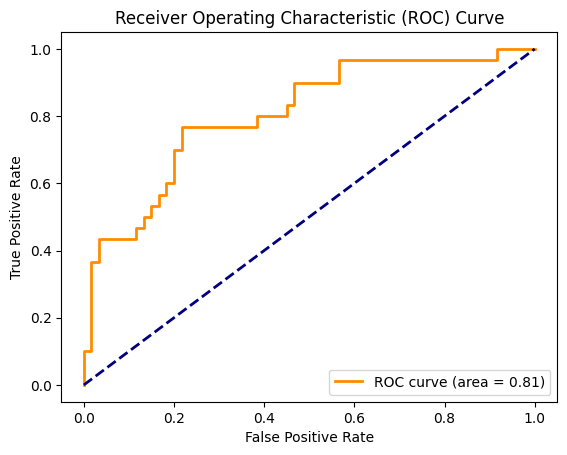

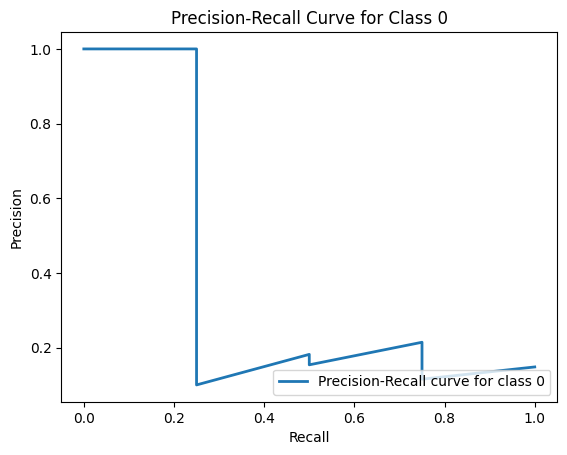

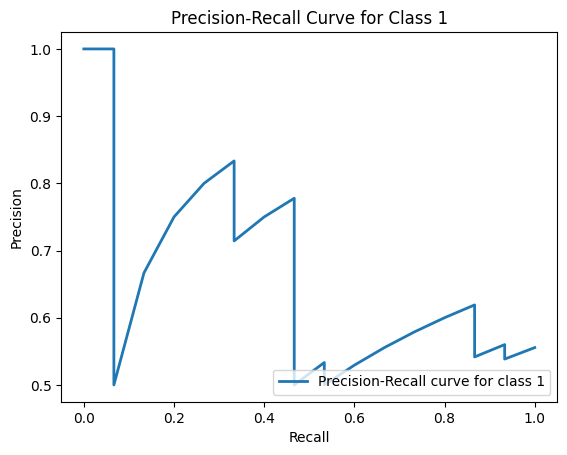

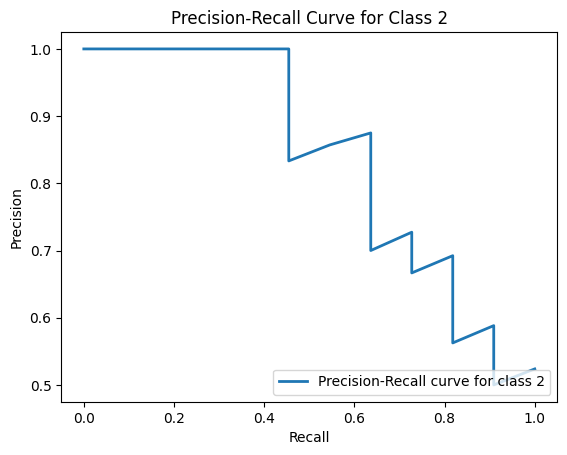

In [29]:

# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'
test_dir = '../DataSetThesis/test'


# Load the training data
X_train, y_train = load_data(train_dir)

# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the SVM model
clf = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))

# Binarize the labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

clf.fit(X_train, y_train_encoded)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), clf.decision_function(X_test).ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve for each class
precision = dict()
recall = dict()

for i in range(len(label_encoder.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], clf.decision_function(X_test)[:, i])
    plt.figure()
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve for class {}'.format(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()


## oversampling

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.63      0.80      0.71        15
           2       0.70      0.64      0.67        11

    accuracy                           0.67        30
   macro avg       0.78      0.56      0.59        30
weighted avg       0.71      0.67      0.65        30

Confusion Matrix:
[[ 1  3  0]
 [ 0 12  3]
 [ 0  4  7]]


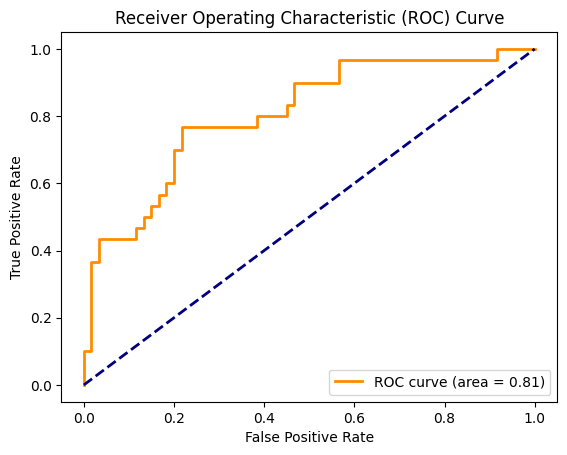

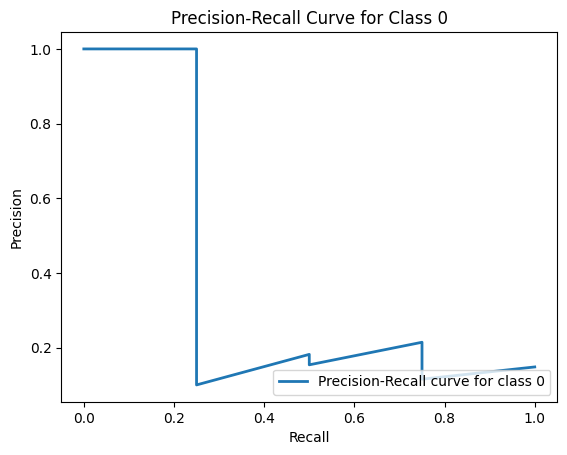

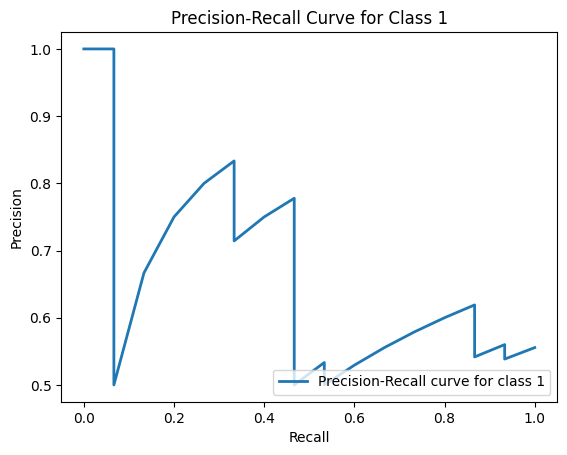

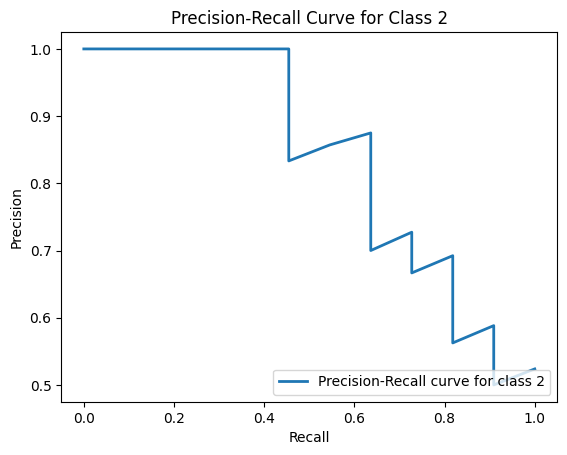

In [30]:

# Load the training data
X_train, y_train = load_data(train_dir)

# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Create and train the SVM model on the resampled data
clf = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), clf.decision_function(X_test).ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve for each class
precision = dict()
recall = dict()

for i in range(len(label_encoder.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], clf.decision_function(X_test)[:, i])
    plt.figure()
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve for class {}'.format(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()


## Multiclass SVM Evaluation with ROC and Precision-Recall Curves

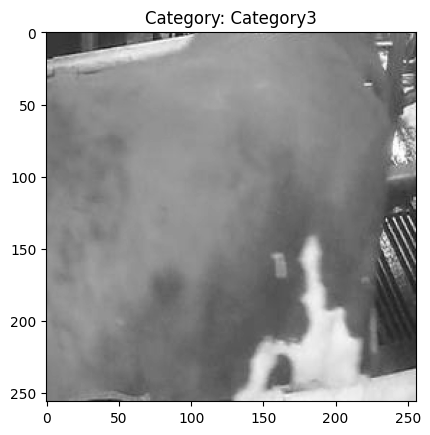

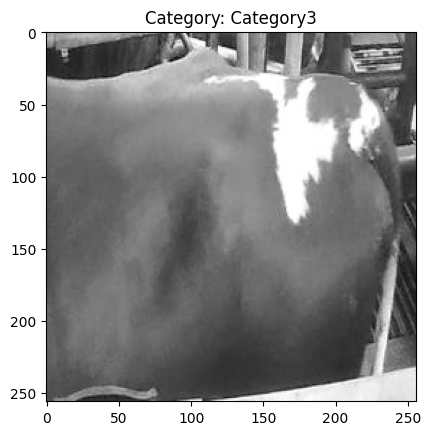

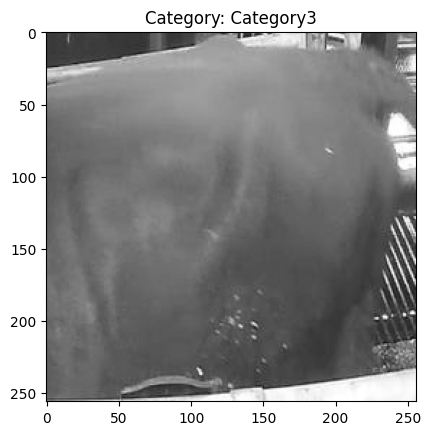

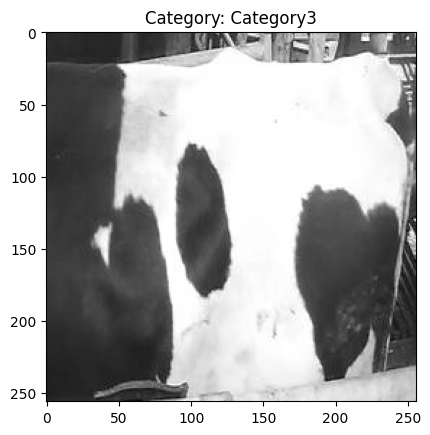

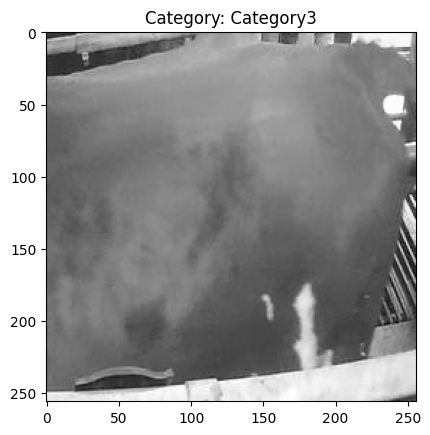

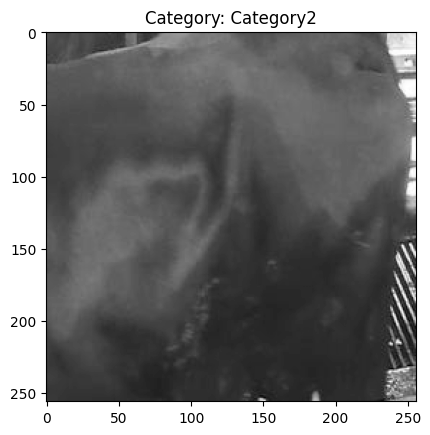

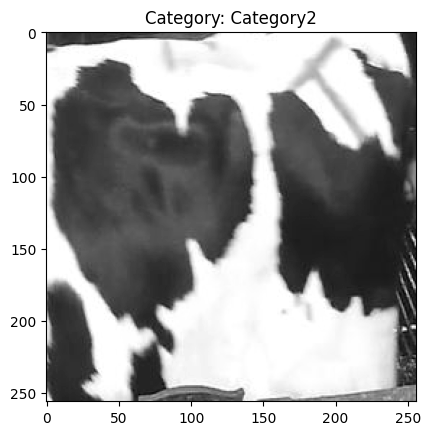

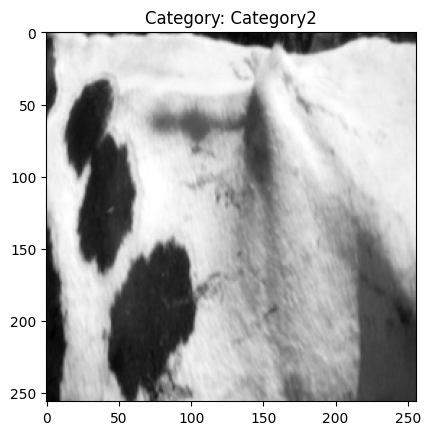

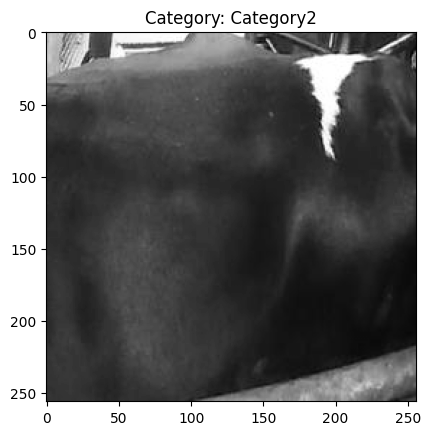

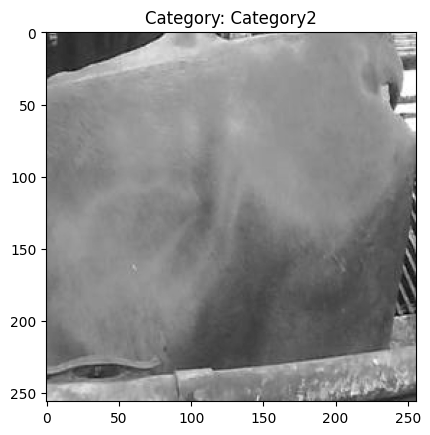

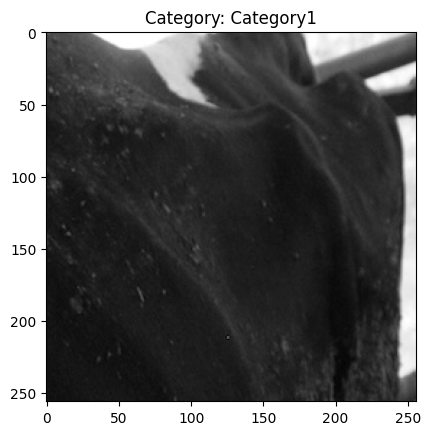

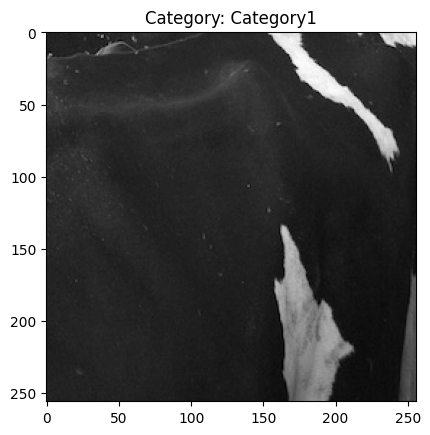

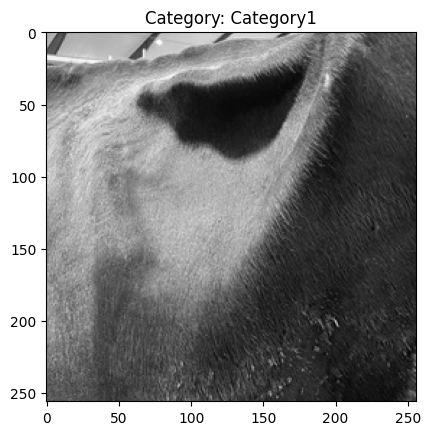

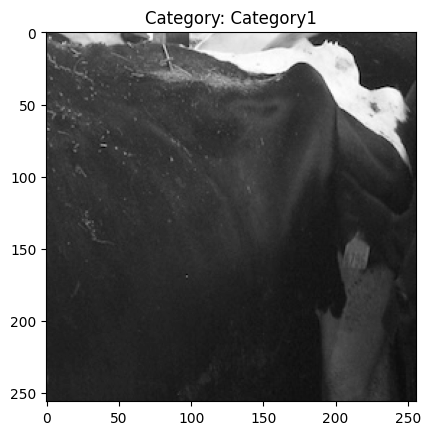

Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.71        14
   macro avg       0.72      0.72      0.72        14
weighted avg       0.71      0.71      0.71        14

Confusion Matrix:
[[3 1 0]
 [1 3 1]
 [0 1 4]]


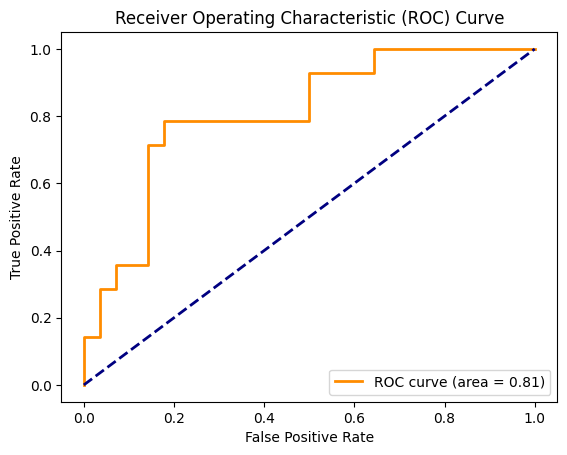

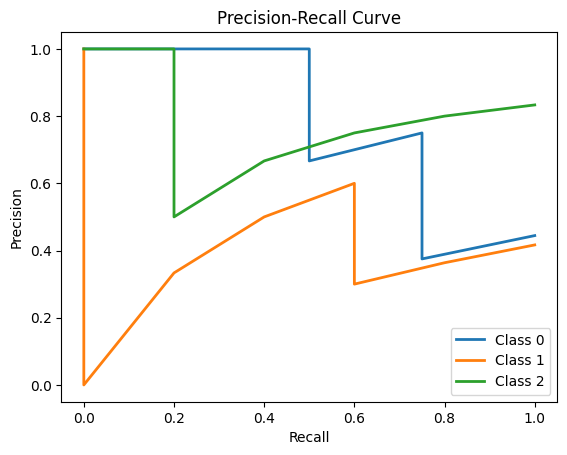

In [40]:

# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the SVM model
clf = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))

# Binarize the labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

clf.fit(X_train, y_train_encoded)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), clf.decision_function(X_test).ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision = dict()
recall = dict()
for i in range(len(np.unique(y_train_encoded))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], clf.decision_function(X_test)[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.show()


## "Optimizing SVM Model Parameters using Grid Search with Cross-Validation"

Optimized Parameters: {'C': 0.1, 'kernel': 'linear'}
Optimized Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.71        14
   macro avg       0.72      0.72      0.72        14
weighted avg       0.71      0.71      0.71        14



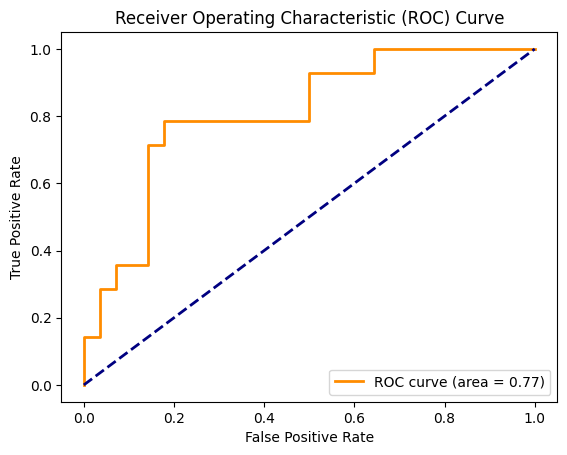

In [41]:

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly']}

# Initialize the SVM model
svm_model = svm.SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_train, y_train_encoded)

# Get the best parameters
best_params = grid_search.best_params_

# Update the parameters of the SVM model with the best ones
svm_model.set_params(**best_params)

# Wrap the updated SVM model in OneVsRestClassifier
best_svm_model = OneVsRestClassifier(svm_model)
best_svm_model.fit(X_train, y_train_encoded)

# Make predictions and evaluate
y_pred_optimized = best_svm_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test_encoded, y_pred_optimized)

# Print details
print(f'Optimized Parameters: {best_params}')
print(f'Optimized Accuracy: {accuracy_optimized}')

# Classification Report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_optimized))

# ROC Curve and AUC
y_score_optimized = best_svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), y_score_optimized.ravel())
roc_auc = roc_auc_score(y_test_binarized, y_score_optimized)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Oversampling

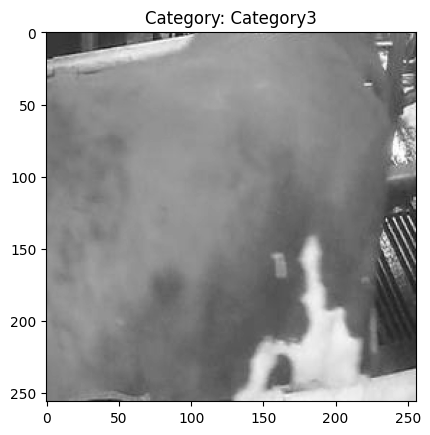

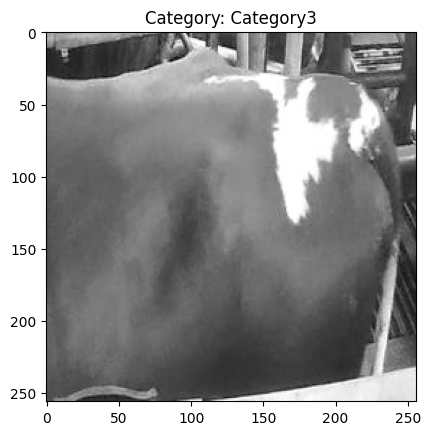

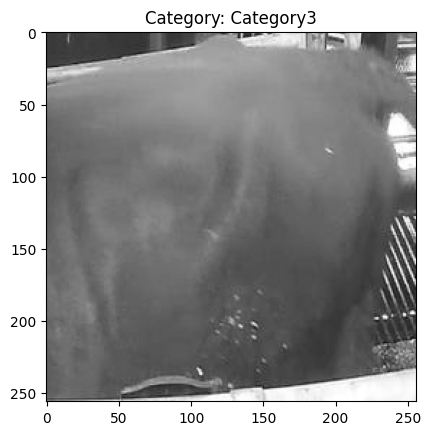

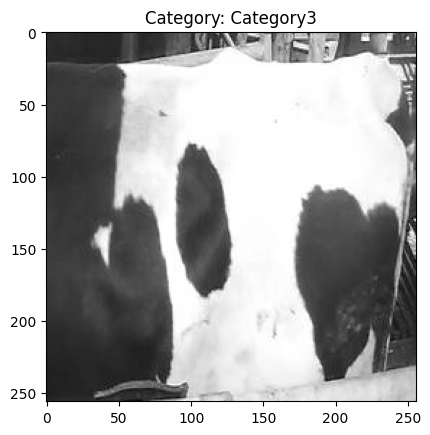

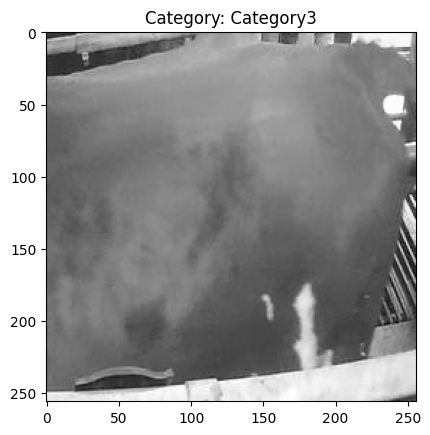

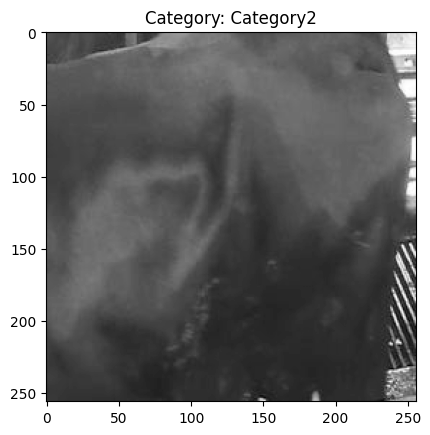

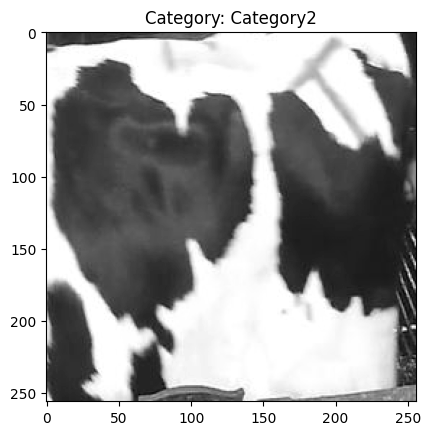

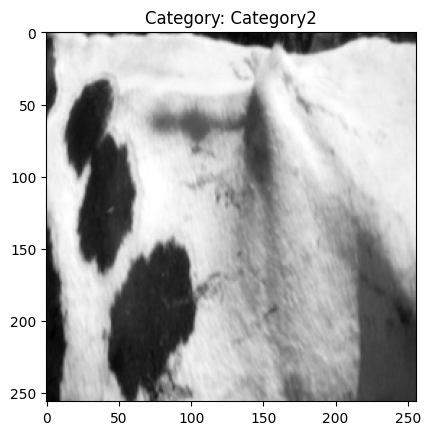

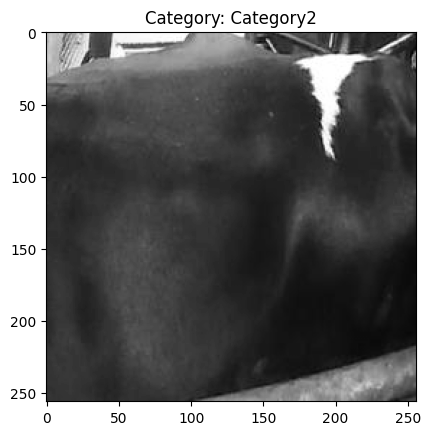

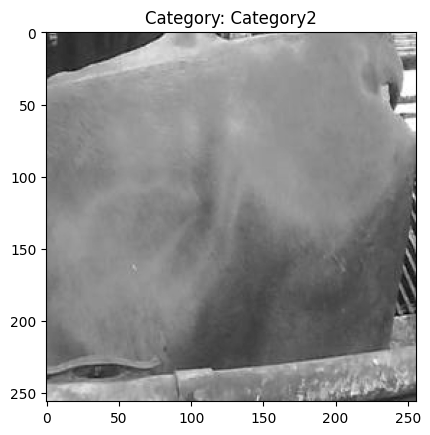

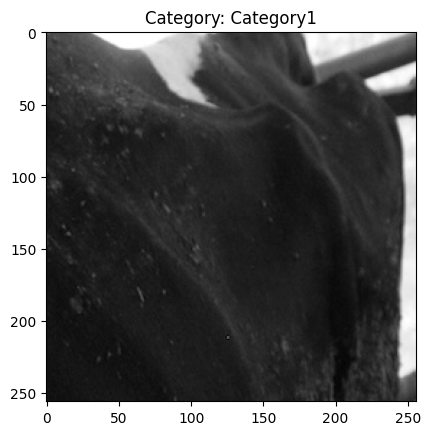

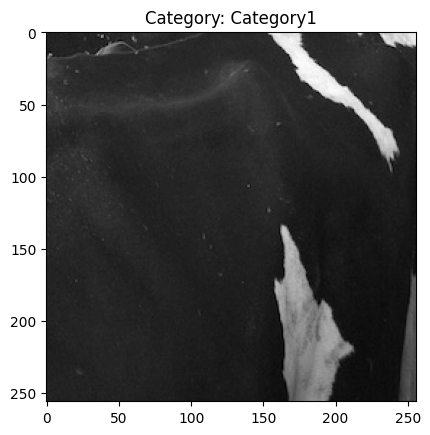

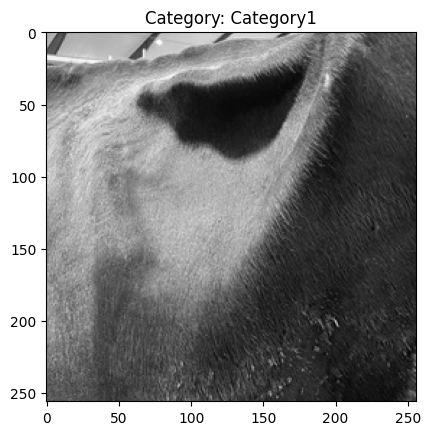

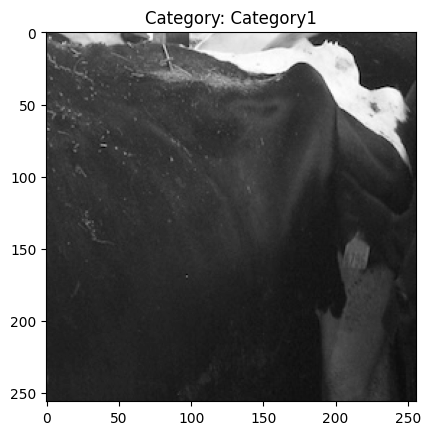

Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.60      0.60      0.60         5
           2       0.80      0.80      0.80         5

    accuracy                           0.71        14
   macro avg       0.72      0.72      0.72        14
weighted avg       0.71      0.71      0.71        14

Confusion Matrix:
[[3 1 0]
 [1 3 1]
 [0 1 4]]


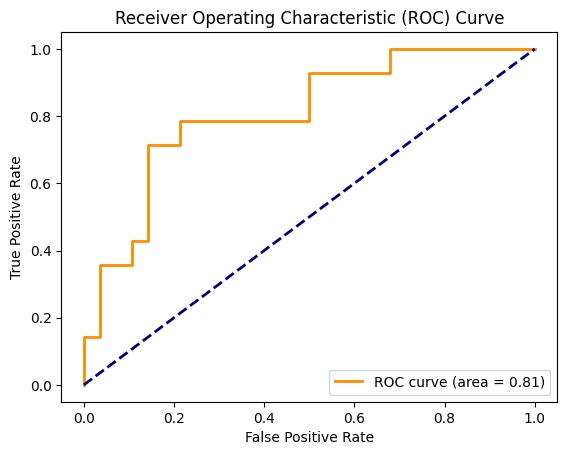

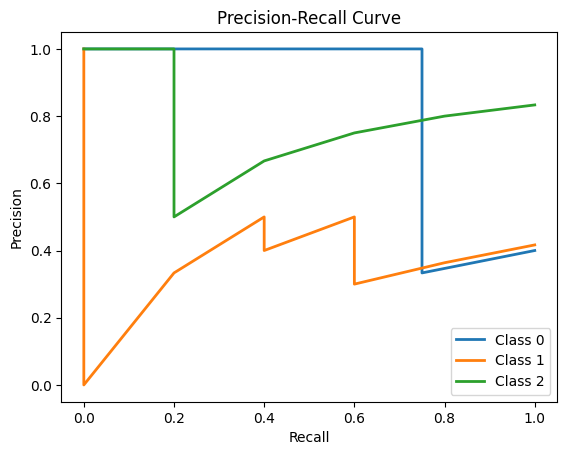

In [42]:

# Load the testing data
X_test, y_test = load_data(test_dir)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)

# Create and train the Logistic Regression model on the resampled data
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_binarized.ravel(), clf.decision_function(X_test).ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision = dict()
recall = dict()
for i in range(len(np.unique(y_train_encoded))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], clf.decision_function(X_test)[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.show()


## CNN 

### Transfer Learning with VGG16 for Image Classification 1 epochs

In [78]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # num_classes is the number of your categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=10)

2023-12-07 21:54:40.355752: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 21:54:40.359620: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train for 6 steps, validate for 2 steps
Epoch 1/10
6/6 [==============================] - 257s 43s/step - loss: 3.5820 - accuracy: 0.4943 - val_loss: 1.8714 - val_accuracy: 0.6190
Epoch 2/10
6/6 [==============================] - 263s 44s/step - loss: 3.4043 - accuracy: 0.5862 - val_loss: 2.3708 - val_accuracy: 0.6429
Epoch 3/10
6/6 [==============================] - 260s 43s/step - loss: 2.6005 - accuracy: 0.6034 - val_loss: 1.9889 - val_accuracy: 0.5238
Epoch 4/10
6/6 [==============================] - 254s 42s/step - loss: 1.7349 - accuracy: 0.6264 - val_loss: 1.1716 - val_accuracy: 0.7857
Epoch 5/10
6/6 [==============================] - 256s 43s/step - loss: 0.9161 - accuracy: 0.7126 - val_loss: 1.0059 - val_accuracy: 0.5714
Epoch 6/10
6/6 [==============================] - 261s 43s/step - loss: 0.6114 - accuracy: 0.7759 - val_loss: 1.0681 - val_accuracy: 0.7381
Epoch 7/10
6/6 [==============================] - 260s 43s/step - loss: 0.5293 - accuracy: 0.7989 - val_loss: 0.8443 - v

In [23]:
# Make predictions on the test set
y_pred = model_base.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[0 3 1]
 [0 9 6]
 [0 9 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.60      0.50        15
           2       0.22      0.18      0.20        11

    accuracy                           0.37        30
   macro avg       0.22      0.26      0.23        30
weighted avg       0.30      0.37      0.32        30



/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [21]:
# Make predictions on the test data
test_generator.reset()
predictions = model_base.predict(test_generator, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(true_labels, predicted_labels))
print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_labels))


1/1 [==============================] - 36s 36s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.60      0.50        15
           2       0.22      0.18      0.20        11

    accuracy                           0.37        30
   macro avg       0.22      0.26      0.23        30
weighted avg       0.30      0.37      0.32        30

Confusion Matrix:
 [[0 3 1]
 [0 9 6]
 [0 9 2]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## experiment with 50 epocs

Train for 6 steps, validate for 2 steps
Epoch 1/50
6/6 [==============================] - 260s 43s/step - loss: 5.8807 - accuracy: 0.4080 - val_loss: 4.0589 - val_accuracy: 0.5714
Epoch 2/50
6/6 [==============================] - 269s 45s/step - loss: 3.5471 - accuracy: 0.5977 - val_loss: 2.2586 - val_accuracy: 0.5476
Epoch 3/50
6/6 [==============================] - 273s 45s/step - loss: 1.9811 - accuracy: 0.6092 - val_loss: 1.4750 - val_accuracy: 0.5000
Epoch 4/50
6/6 [==============================] - 274s 46s/step - loss: 1.0834 - accuracy: 0.7069 - val_loss: 1.2509 - val_accuracy: 0.7143
Epoch 5/50
6/6 [==============================] - 275s 46s/step - loss: 0.5140 - accuracy: 0.8333 - val_loss: 0.8155 - val_accuracy: 0.7143
Epoch 6/50
6/6 [==============================] - 277s 46s/step - loss: 0.3926 - accuracy: 0.8333 - val_loss: 0.7847 - val_accuracy: 0.7381
Epoch 7/50
6/6 [==============================] - 279s 47s/step - loss: 0.3525 - accuracy: 0.8276 - val_loss: 0.7093 - v

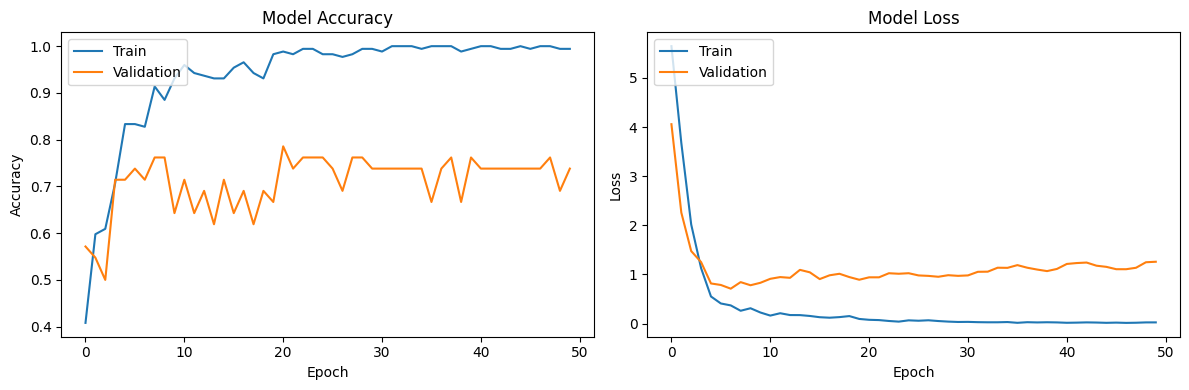

1/1 [==============================] - 40s 40s/step - loss: 2.0948 - accuracy: 0.5333
Test Loss: 2.0948
Test Accuracy: 0.5333

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.64      0.93      0.76        15
           2       0.75      0.55      0.63        11

    accuracy                           0.67        30
   macro avg       0.46      0.49      0.46        30
weighted avg       0.59      0.67      0.61        30


Confusion Matrix:
[[ 0  3  1]
 [ 0 14  1]
 [ 0  5  6]]


/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [34]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model_base50 = models.Sequential()
model_base50.add(base_model)
model_base50.add(layers.Flatten())
model_base50.add(layers.Dense(256, activation='relu'))
model_base50.add(layers.Dropout(0.5))
model_base50.add(layers.Dense(3, activation='softmax'))  # num_classes is the number of your categories

# Compile the model
model_base50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model for 50 epochs
history = model_base50.fit(train_generator, validation_data=val_generator, epochs=50)

# Save the model
model_base50.save('model_50.h5')

# Plot the batch loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model_base50.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate predictions
test_generator.reset()
y_pred = model_base50.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Calculate metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


## CNN without augmetation

In [20]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model_base = models.Sequential()
model_base.add(base_model)
model_base.add(layers.Flatten())
model_base.add(layers.Dense(256, activation='relu'))
model_base.add(layers.Dropout(0.5))
model_base.add(layers.Dense(3, activation='softmax'))  # num_classes is the number of your categories

# Compile the model
model_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_base.fit(train_generator, validation_data=val_generator, epochs=10)


Train for 6 steps, validate for 2 steps
Epoch 1/10
6/6 [==============================] - 260s 43s/step - loss: 6.3609 - accuracy: 0.4023 - val_loss: 4.0791 - val_accuracy: 0.5476
Epoch 2/10
6/6 [==============================] - 262s 44s/step - loss: 3.0553 - accuracy: 0.6207 - val_loss: 1.3819 - val_accuracy: 0.6905
Epoch 3/10
6/6 [==============================] - 268s 45s/step - loss: 1.9900 - accuracy: 0.5920 - val_loss: 1.7610 - val_accuracy: 0.5000
Epoch 4/10
6/6 [==============================] - 263s 44s/step - loss: 1.8162 - accuracy: 0.5977 - val_loss: 1.0484 - val_accuracy: 0.5952
Epoch 5/10
6/6 [==============================] - 270s 45s/step - loss: 0.8892 - accuracy: 0.7126 - val_loss: 0.7483 - val_accuracy: 0.8333
Epoch 6/10
6/6 [==============================] - 270s 45s/step - loss: 0.6954 - accuracy: 0.7241 - val_loss: 0.8861 - val_accuracy: 0.6429
Epoch 7/10
6/6 [==============================] - 272s 45s/step - loss: 0.4341 - accuracy: 0.7931 - val_loss: 0.7945 - v

## using CNN with augmetation

In [10]:
# Define the paths to your image folders
train_dir = '../DataSetThesis/train'
val_dir = '../DataSetThesis/validation'

# Define the image dimensions and batch size
img_size = (256, 256)
batch_size = 32

# Create ImageDataGenerator instances for training, validation
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen_aug = ImageDataGenerator(rescale=1./255)

# Create the generators for training and validation
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator_aug = val_datagen_aug.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  # num_classes is the number of your categories

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator_aug, validation_data=val_generator_aug, epochs=10)


Found 174 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Train for 6 steps
Epoch 1/10
6/6 [==============================] - 211s 35s/step - loss: 4.9554 - accuracy: 0.4885
Epoch 2/10
6/6 [==============================] - 210s 35s/step - loss: 3.6949 - accuracy: 0.4713
Epoch 3/10
6/6 [==============================] - 210s 35s/step - loss: 2.3168 - accuracy: 0.4713
Epoch 4/10
6/6 [==============================] - 214s 36s/step - loss: 1.3385 - accuracy: 0.5805
Epoch 5/10
6/6 [==============================] - 215s 36s/step - loss: 1.1100 - accuracy: 0.5920
Epoch 6/10
6/6 [==============================] - 216s 36s/step - loss: 0.9014 - accuracy: 0.5517
Epoch 7/10
6/6 [==============================] - 217s 36s/step - loss: 0.7931 - accuracy: 0.6149
Epoch 8/10
6/6 [==============================] - 222s 37s/step - loss: 0.8366 - accuracy: 0.5920
Epoch 9/10
6/6 [==============================] - 226s 38s/step - loss: 0.8237 - accuracy: 0.5805
Epoch 10/10
6/6 [===

In [17]:

test_dir = '../DataSetThesis/test'

test_datagen_aug = ImageDataGenerator(rescale=1./255)

test_generator_aug = test_datagen_aug.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 30 images belonging to 3 classes.


In [22]:

# Assuming your model is already trained
predictions = model.predict(test_generator_aug)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator_aug.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate additional metrics
accuracy = accuracy_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels, average='weighted')  # Change average as needed

# Print the confusion matrix and metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1 Score:", f1)

# Display classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=test_generator_aug.class_indices.keys()))


Confusion Matrix:
[[ 0  3  1]
 [ 0 13  2]
 [ 0  9  2]]

Accuracy: 0.5
F1 Score: 0.4166666666666667

Classification Report:
              precision    recall  f1-score   support

   Category1       0.00      0.00      0.00         4
   Category2       0.52      0.87      0.65        15
   Category3       0.40      0.18      0.25        11

    accuracy                           0.50        30
   macro avg       0.31      0.35      0.30        30
weighted avg       0.41      0.50      0.42        30



/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rezaderakhshan/opt/anaconda3/envs/tensor/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

Train for 6 steps, validate for 2 steps
Epoch 1/10
6/6 [==============================] - 256s 43s/step - loss: 0.2840 - accuracy: 0.8966 - val_loss: 0.9104 - val_accuracy: 0.7143
Epoch 2/10
6/6 [==============================] - 259s 43s/step - loss: 0.1916 - accuracy: 0.9483 - val_loss: 0.9050 - val_accuracy: 0.6905
Epoch 3/10
6/6 [==============================] - 264s 44s/step - loss: 0.1948 - accuracy: 0.9253 - val_loss: 0.9520 - val_accuracy: 0.7143
Epoch 4/10
6/6 [==============================] - 267s 44s/step - loss: 0.1550 - accuracy: 0.9540 - val_loss: 0.9793 - val_accuracy: 0.7143
Epoch 5/10
6/6 [==============================] - 268s 45s/step - loss: 0.1622 - accuracy: 0.9253 - val_loss: 0.9648 - val_accuracy: 0.7381
Epoch 6/10
6/6 [==============================] - 265s 44s/step - loss: 0.1437 - accuracy: 0.9483 - val_loss: 0.9391 - val_accuracy: 0.7381
Epoch 7/10
6/6 [==============================] - 266s 44s/step - loss: 0.1350 - accuracy: 0.9425 - val_loss: 0.9307 - v

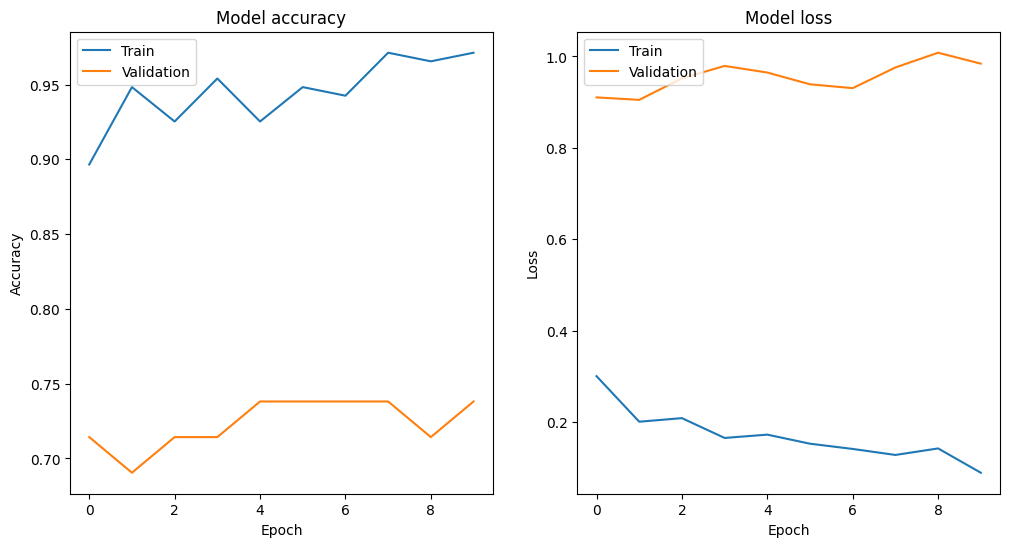

In [80]:
# Train the model and get the training history
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Call the function to plot training history
plot_training_history(history)
